In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [ ]:
# Read the data from the file
with open('rulesWSharderlong.txt', 'r') as file:
    lines = file.readlines()

In [ ]:
df = pd.DataFrame(columns=['rule', 'min', 'max', 'mean_all', 'std_all',
                                 'geq_062', 'mean_062', 'std_062'])

# Process each line
for line in lines:
    # Check if the line is empty and skip it
    if line.strip() == "":
        continue

    # Split the line into components and convert them to floats, excluding the last part
    parts = line.strip().split(',')
    rule = parts[0]  # First part is the rule name
    samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

    samples062 = [x for x in samples if x >= 0.62] # If you flip fair coin, 0.62 corresponds to 1% chance

    # Calculate statistics
    min_val = min(samples)
    max_val = max(samples)
    mean_val = np.mean(samples)
    std_val = np.std(samples)
    percentage_greater_than_06 = (len(samples062) / len(samples))
    if (percentage_greater_than_06 > 0):
      mean_06 = np.mean(samples062)
      std_06 = np.std(samples062)
    else:
      mean_06 = 0
      std_06 = 0

    new_row = {
        'rule': rule,
        'min': min_val,
        'max': max_val,
        'mean_all': mean_val,
        'std_all': std_val,
        'geq_062': percentage_greater_than_06,
        'mean_062': mean_06,
        'std_062': std_06
    }

    new_row_df = pd.DataFrame([new_row])

    # Append the new row to the empty DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)


df

rule   min   max  mean_all   std_all  geq_062  mean_062   std_062
0      0  0.50  0.50    0.5000  0.000000     0.00         0         0
1      1  0.45  0.62    0.5117  0.031719     0.02      0.62       0.0
2      2  0.44  0.64    0.5081  0.030649     0.04     0.625   0.00866
3      3  0.37  0.67    0.5112  0.041407     0.03  0.643333  0.018856
4      4  0.43  0.58    0.5048  0.024145     0.00         0         0
..   ...   ...   ...       ...       ...      ...       ...       ...
251  251  0.50  0.50    0.5000  0.000000     0.00         0         0
252  252  0.48  0.52    0.5000  0.003464     0.00         0         0
253  253  0.50  0.50    0.5000  0.000000     0.00         0         0
254  254  0.50  0.50    0.5000  0.000000     0.00         0         0
255  255  0.50  0.58    0.5008  0.007960     0.00         0         0

[256 rows x 8 columns]

In [ ]:
# Define thresholds for 'mean_val' to categorize into groups
geq_062_bins = [0, 0.3, 0.6, 0.7, 1]
geq_062_labels = ['Random', 'Mostly Random', 'Learning', 'Learning well']

# Categorize 'mean_val' into groups
df['geq_062_group'] = pd.cut(df['geq_062'], bins=geq_062_bins, labels=geq_062_labels, include_lowest=True)

In [ ]:
# Define thresholds for 'mean_val' to categorize into groups
mean_062_bins = [0, 0.7, 1]
mean_062_labels = ['Low', 'High']

# Categorize 'mean_val' into groups
df['mean_062_group'] = pd.cut(df['mean_062'], bins=mean_062_bins, labels=mean_062_labels, include_lowest=True)

In [ ]:
# Group by 'mean_val_group' and 'std_val_group', then list the rules
grouped_rules = df.groupby(['geq_062_group', 'mean_062_group'])['rule'].apply(list).reset_index(name='rules')
grouped_rules['rules_length'] = grouped_rules['rules'].apply(lambda x: len(x) if isinstance(x, list) else 0)

grouped_rules

geq_062_group mean_062_group  \
0         Random            Low   
1         Random           High   
2  Mostly Random            Low   
3  Mostly Random           High   
4       Learning            Low   
5       Learning           High   
6  Learning well            Low   
7  Learning well           High   

                                               rules  rules_length  
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           253  
1                                     [97, 154, 240]             3  
2                                                NaN             0  
3                                                NaN             0  
4                                                NaN             0  
5                                                NaN             0  
6                                                NaN             0  
7                                                NaN             0

In [ ]:
def plotHistogram(rules):
    if not isinstance(rules, list):
        print("There are no rules for this combination")
        return

    if len(rules) > 5:
        rules = random.sample(rules, 5)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(rules), figsize=(20, 4))  # Adjust figsize as needed
    count = 0

    # Process each line
    for line in lines:
        # Check if the line is empty and skip it
        if line.strip() == "":
            continue

        # Split the line into components and convert them to floats, excluding the last part
        parts = line.strip().split(',')
        rule = parts[0]  # First part is the rule name

        if rule in rules:
            samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

            if len(rules) == 1:
                # Plot the first histogram
                axs.hist(samples, bins=21, alpha=0.7, label=f'Rule {rule}', range=(0, 1))
                axs.set_title(f'Rule {rule}')
                # Set plot title and labels

                axs.set_xlabel('Accuracy')
                axs.set_ylabel('Frequency')
                axs.set_xlim(0, 1)  # Ensure x-axis is limited to 0-1
            else:
                # Plot the first histogram
                axs[count].hist(samples, bins=21, alpha=0.7, label=f'Rule {rule}', range=(0, 1))
                axs[count].set_title(f'Rule {rule}')
                # Set plot title and labels

                axs[count].set_xlabel('Accuracy')
                axs[count].set_ylabel('Frequency')
                axs[count].set_xlim(0, 1)  # Ensure x-axis is limited to 0-1

            count += 1



    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

Random Low


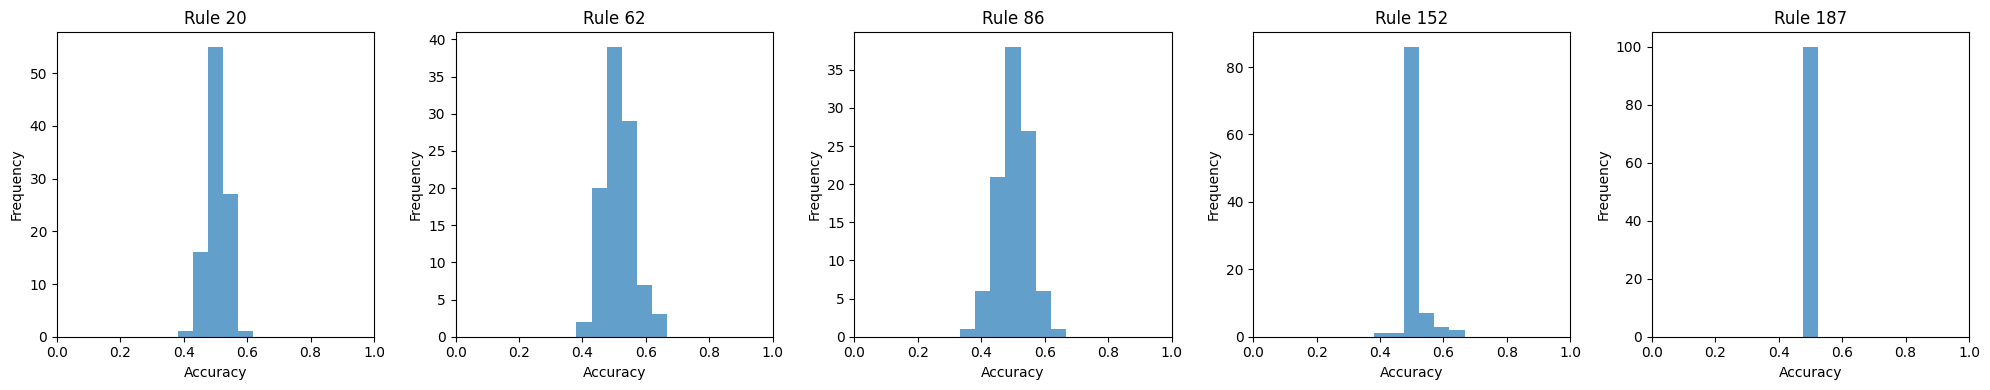

Random High


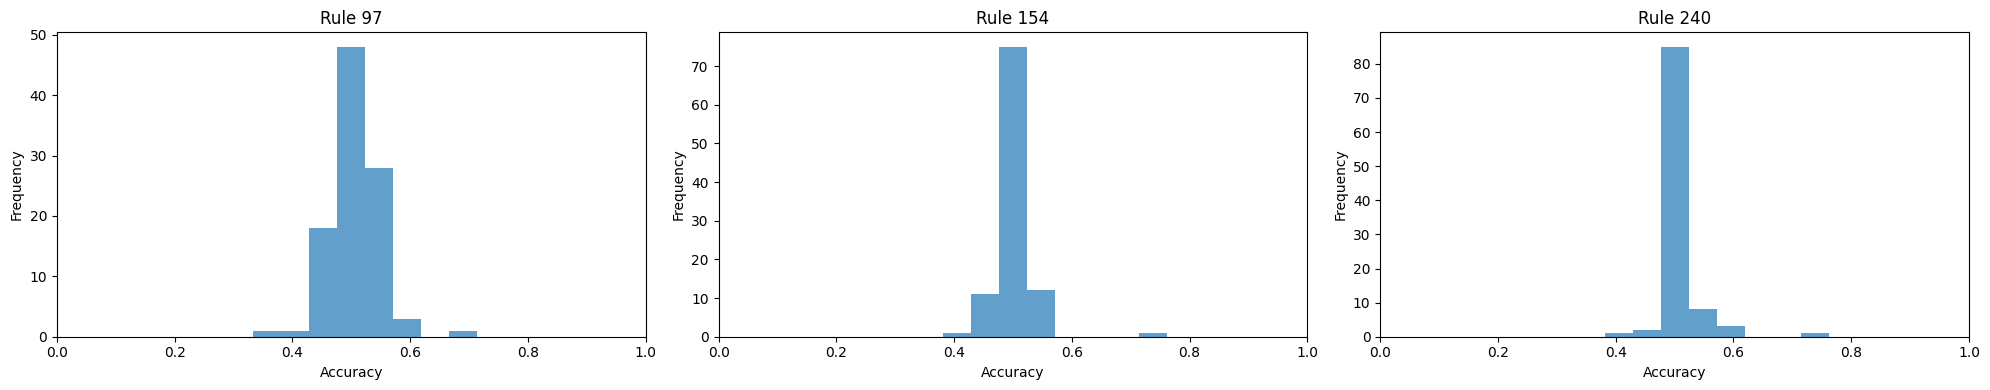

Mostly Random Low
There are no rules for this combination
Mostly Random High
There are no rules for this combination
Learning Low
There are no rules for this combination
Learning High
There are no rules for this combination
Learning well Low
There are no rules for this combination
Learning well High
There are no rules for this combination


In [ ]:
# Assuming 'grouped_df' is your DataFrame and it has a 'rules' column with lists
for index, row in grouped_rules.iterrows():
    print(row['geq_062_group'], row['mean_062_group'])

    plotHistogram(row['rules'])

In [ ]:
# Read the data from the file
with open('distribution.txt', 'r') as file:
    lines = file.readlines()

In [ ]:
def moving_average(data, window_size):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0))
    ma_vec = (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
    # For the edges, you can just repeat the first and last average calculated for simplicity,
    # or handle it differently based on your requirements
    return np.concatenate(([ma_vec[0]]*2, ma_vec, [ma_vec[-1]]*2))

In [1]:
plt.figure(figsize=[10, 6])  # Create a new figure with a specified size

# Process each line
for line in lines:
    # Check if the line is empty and skip it
    if line.strip() == "":
        continue

    # Split the line into components and convert them to floats, excluding the last part
    parts = line.strip().split(',')
    topology = parts[0]  # First part is the rule name
    samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

    x_values = np.linspace(0, 0.99, 100)

    window_size = 5

    # Compute the moving average
    average_samples = moving_average(samples, window_size)
    # Plotting

    plt.plot(x_values, average_samples, '-o', label=topology)  # Plot samples against x_values

plt.title(f'Samples for {topology}')  # Title of the plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Sample Value')  # Label for the y-axis
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot


NameError: name 'plt' is not defined

In [ ]:
# Correcting the data parsing

# Reinitialize lists to hold the corrected data
ids_corrected = []
data_corrected = []

# Re-read and correctly process the file
with open('RNX3N.txt', 'r') as file:
    for line in file:
        # Splitting by comma and then stripping spaces
        parts = [part.strip() for part in line.strip().split(',')]
        if parts:
            # Add the first part (ID) to ids_corrected
            ids_corrected.append(parts[0])
            # Add the rest (converted to floats) to data_corrected
            data_corrected.append([float(x) for x in parts[1:]])

# Convert lists to numpy arrays
ids_corrected = np.array(ids_corrected)
data_corrected = np.array(data_corrected)

# Display the shapes and first few entries for verification
print(f"Corrected data shape: {data_corrected.shape}")
print(f"First 5 IDs: {ids_corrected[:5]}")
print(f"First 5 rows of corrected data:\n{data_corrected[:5, :5]}")  # Show some of the data for verification


Corrected data shape: (100, 256)
First 5 IDs: ['0' '1' '2' '3' '4']
First 5 rows of corrected data:
[[0.5  0.66 0.5  0.67 0.5 ]
 [0.5  0.65 0.5  0.81 0.45]
 [0.5  0.68 0.73 0.6  0.53]
 [0.5  0.69 0.49 0.51 0.5 ]
 [0.5  0.57 0.78 0.66 0.47]]


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'ids_corrected' and 'data_corrected' are already defined from your file reading
num_graphs, num_rules = data_corrected.shape
rule_ids = np.arange(1, num_rules + 1)  # Assuming rule IDs start from 1 to number of rules

# Flatten the matrix and pair each accuracy with its graph ID and rule ID
all_pairs = [(graph_id, rule_id, data_corrected[graph_index, rule_index])
             for graph_index, graph_id in enumerate(ids_corrected)
             for rule_index, rule_id in enumerate(rule_ids)]

# Convert the list of tuples into a DataFrame for easier sorting and handling
pairs_df = pd.DataFrame(all_pairs, columns=['Graph ID', 'Rule ID', 'Accuracy'])

# Sort the DataFrame by accuracy from best to worst
sorted_pairs_df = pairs_df.sort_values(by='Accuracy', ascending=False)

# Reset index after sorting
sorted_pairs_df.reset_index(drop=True, inplace=True)

# Display or save the sorted table
print(sorted_pairs_df)

# If you want to save this to a CSV file:
sorted_pairs_df.to_csv('sorted_accuracy_pairs.csv', index=False)

      Graph ID  Rule ID  Accuracy
0           27      171      0.89
1           10      241      0.89
2           11       16      0.89
3           17      139      0.87
4           95      245      0.87
...        ...      ...       ...
25595        5      125      0.37
25596       92      100      0.37
25597       27      100      0.37
25598        1       55      0.37
25599       55      163      0.35

[25600 rows x 3 columns]


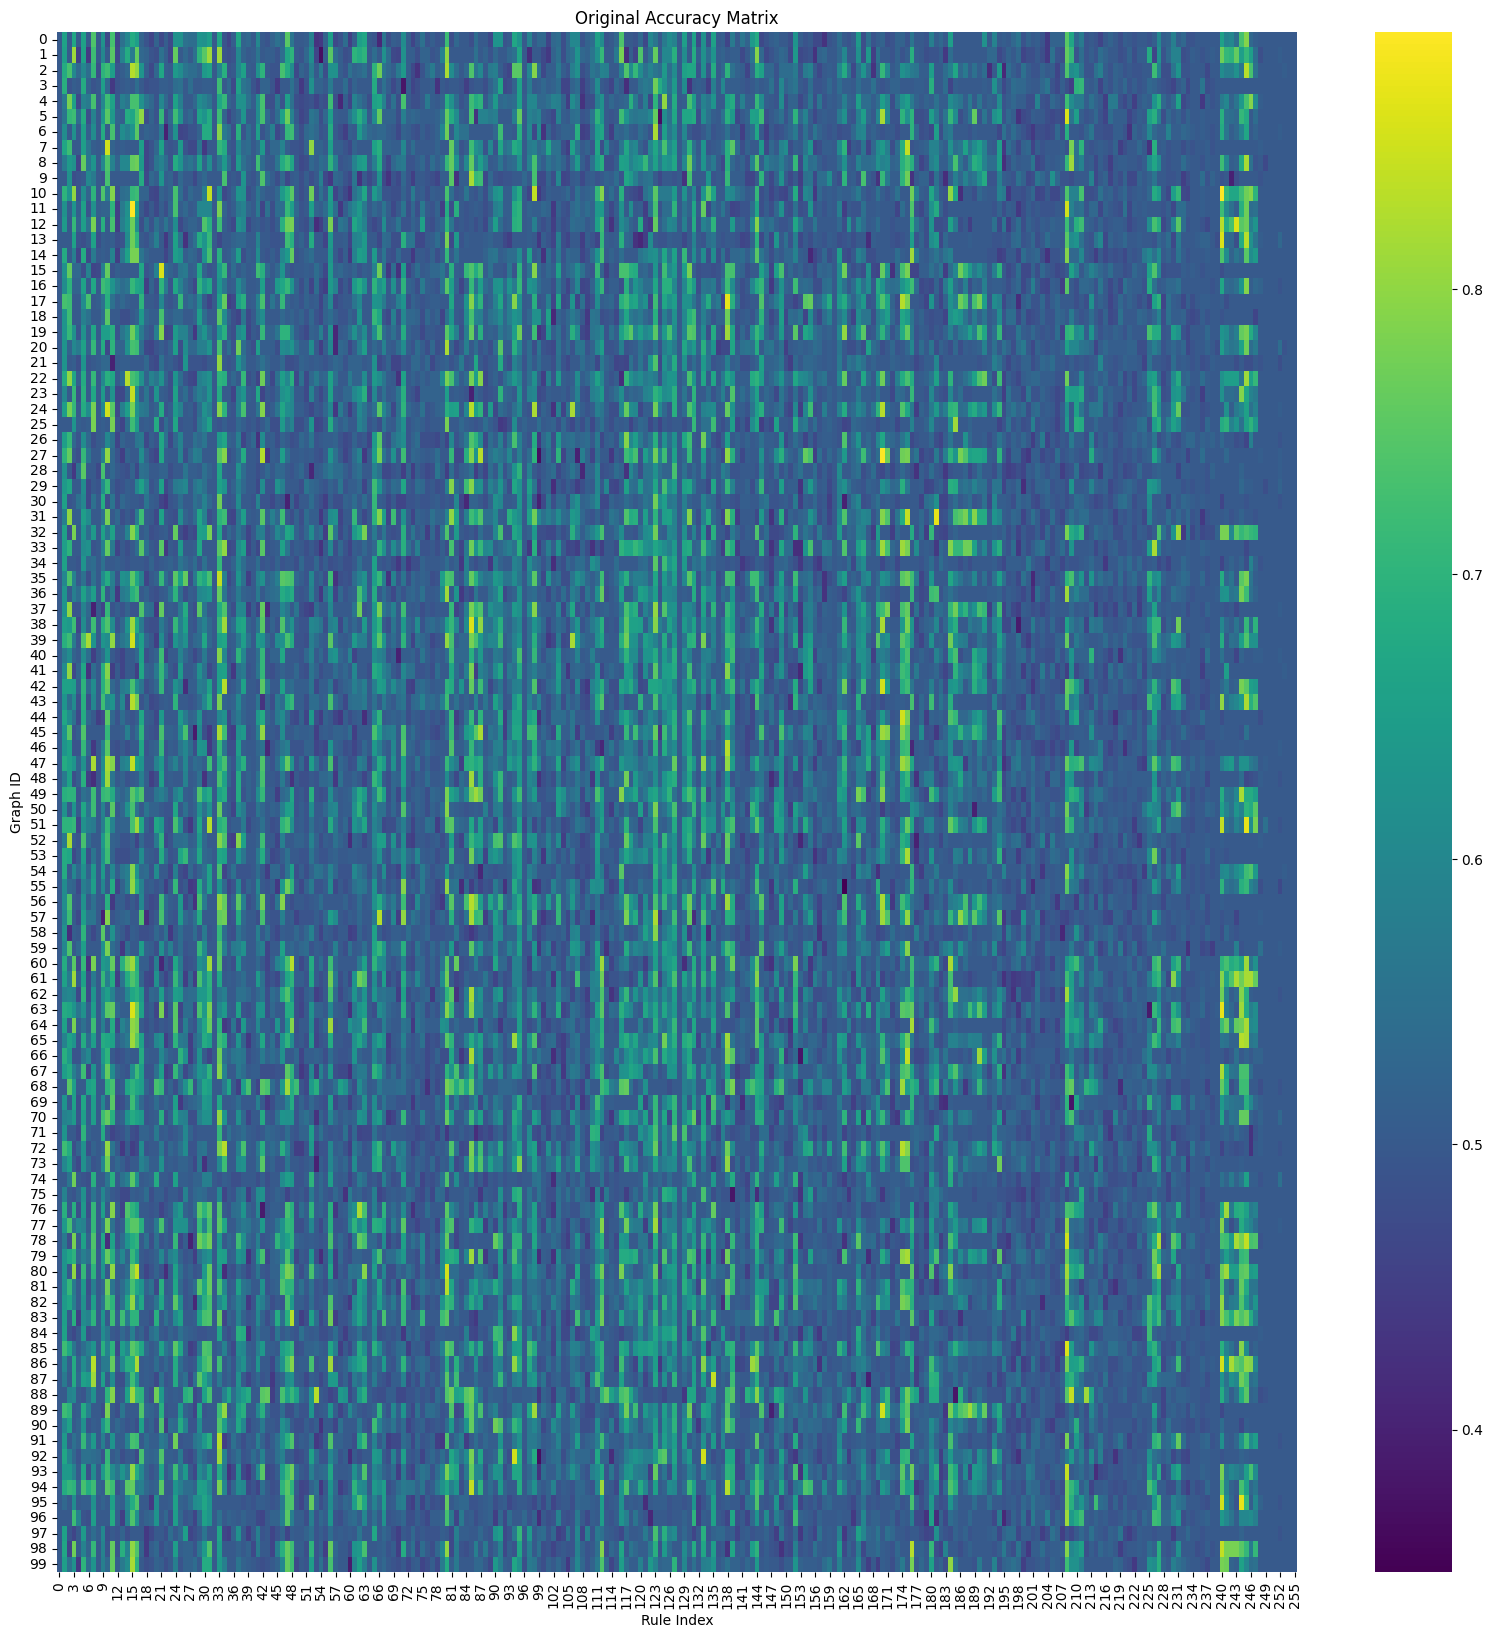

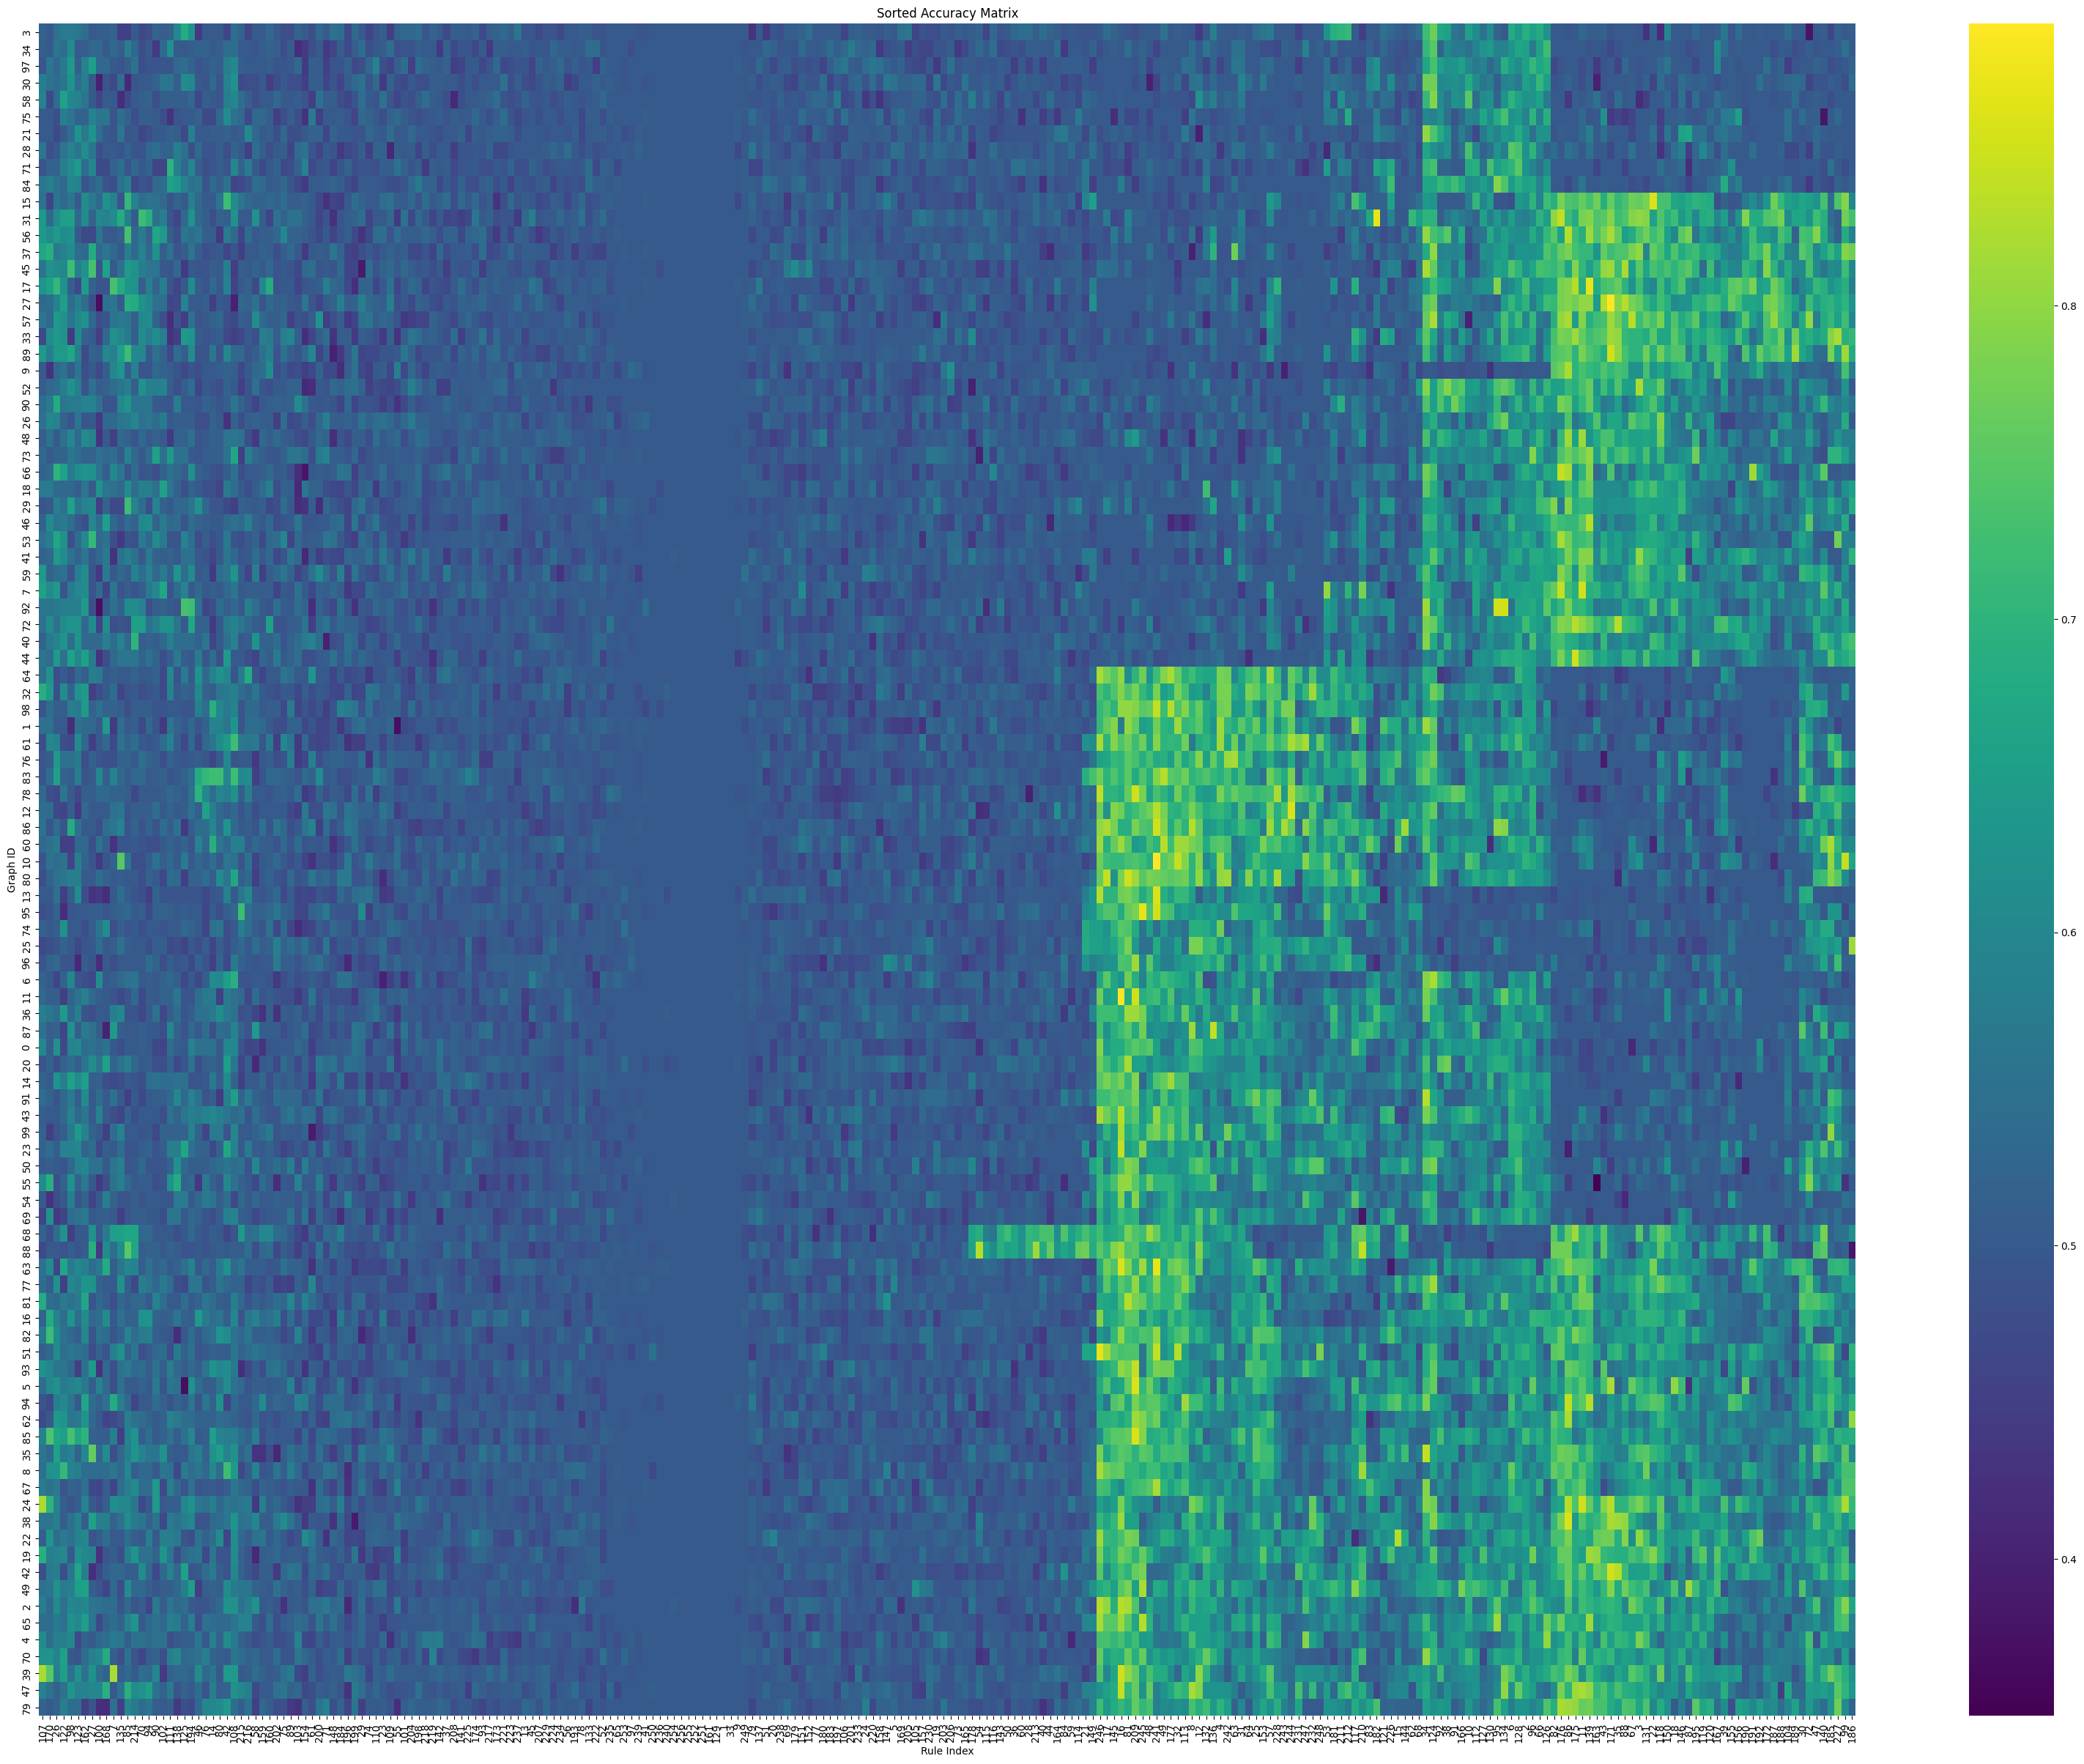

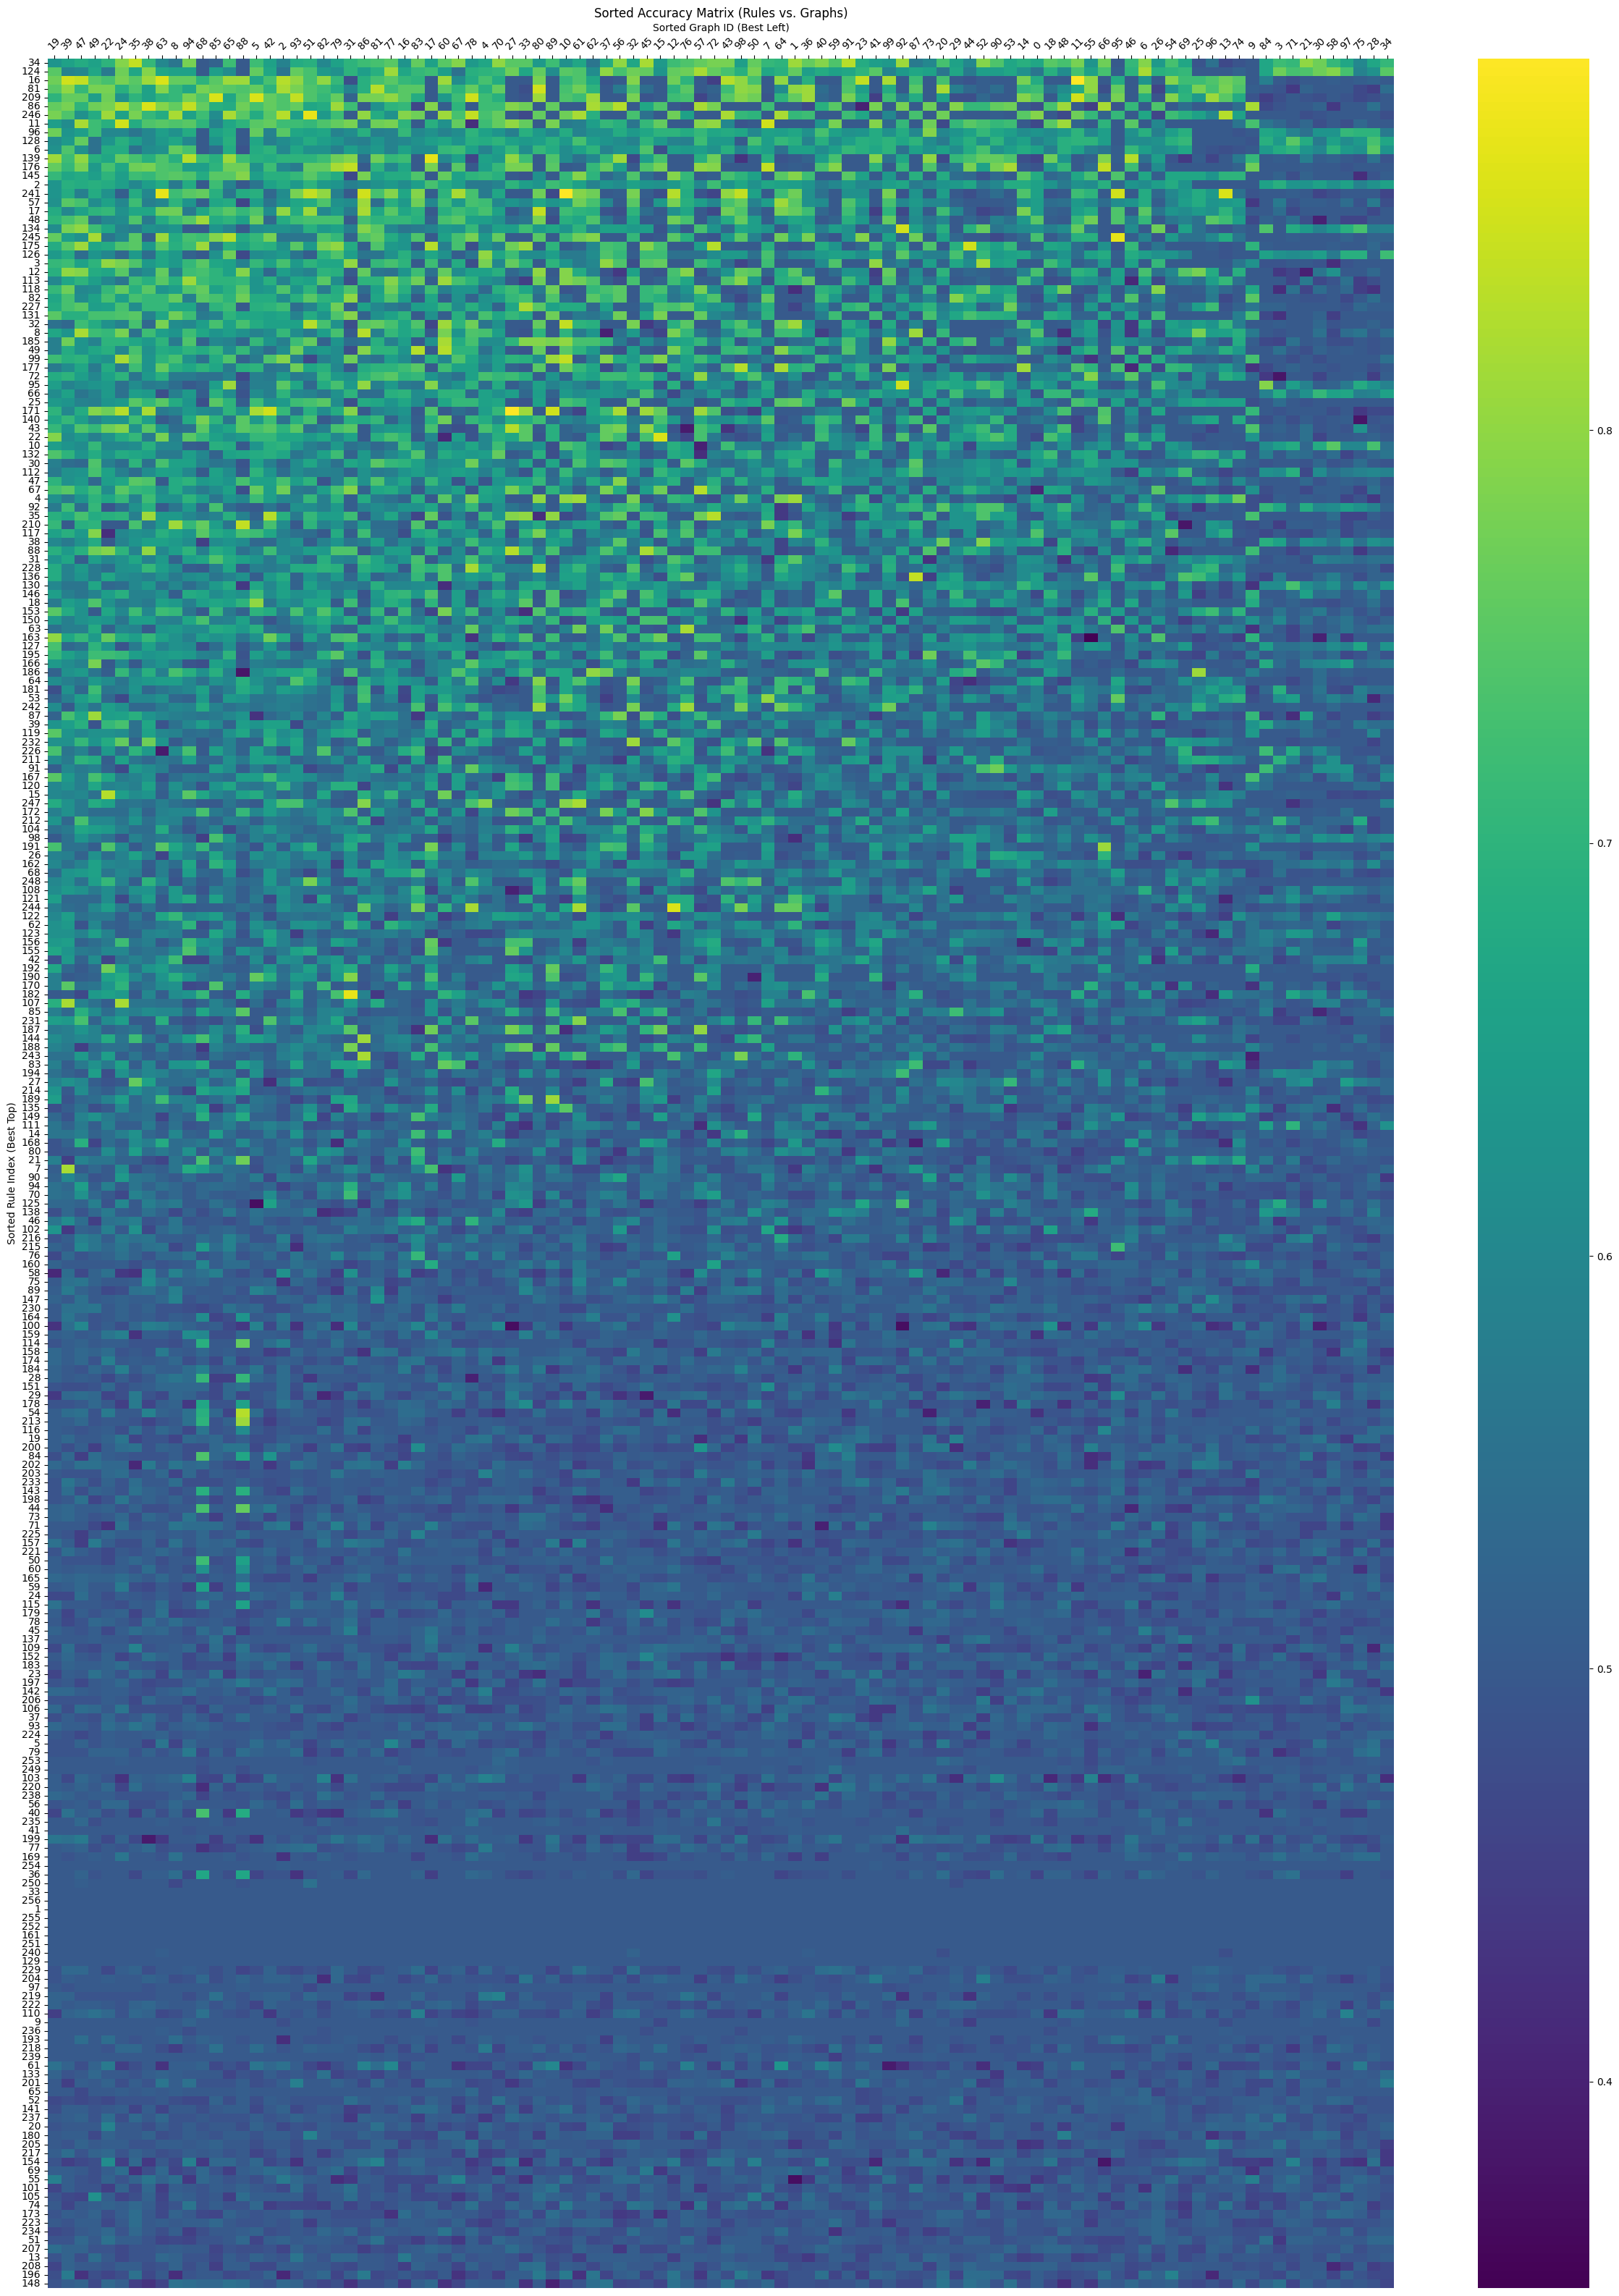

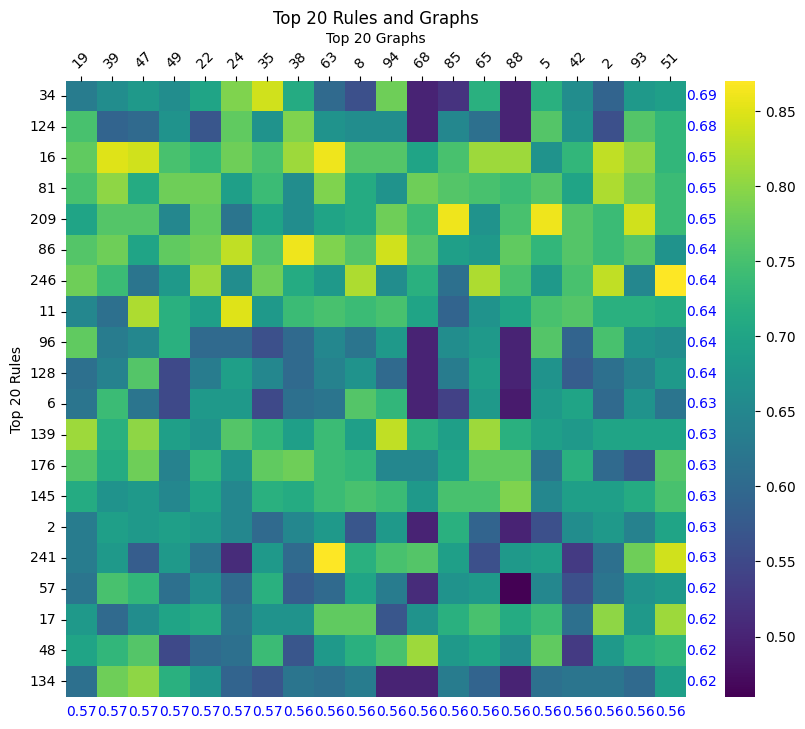

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

# Step 1: Plot the original matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data_corrected, cmap="viridis")
plt.title("Original Accuracy Matrix")
plt.xlabel("Rule Index")
plt.ylabel("Graph ID")
plt.show()

# Step 2: Apply clustering or hierarchical sorting
# We use hierarchical clustering to suggest an initial grouping
row_linkage = hierarchy.linkage(data_corrected, method='ward')
col_linkage = hierarchy.linkage(data_corrected.T, method='ward')

# Get the order of rows and columns after clustering
row_order = leaves_list(row_linkage)
col_order = leaves_list(col_linkage)

# Reorder the data matrix according to the clustering
sorted_data = data_corrected[row_order, :][:, col_order]
sorted_graph_ids = ids_corrected[row_order]
sorted_rule_ids = rule_ids[col_order]

# Visualize the sorted matrix
plt.figure(figsize=(40, 30))
sns.heatmap(sorted_data, cmap="viridis", xticklabels=rule_ids[col_order], yticklabels=ids_corrected[row_order])
plt.title("Sorted Accuracy Matrix")
plt.xlabel("Rule Index")
plt.ylabel("Graph ID")
plt.show()

# Instead of using leaves_list directly, we first calculate average accuracies
# Calculate average accuracy per graph (row)
row_averages = np.mean(data_corrected, axis=1)
# Sort rows based on average accuracy, best (highest) first
sorted_row_indices = np.argsort(row_averages)[::-1]

# Calculate average accuracy per rule (column)
col_averages = np.mean(data_corrected, axis=0)
# Sort columns based on average accuracy, best (highest) first
sorted_col_indices = np.argsort(col_averages)[::-1]

# Rearrange the data according to the new sorted indices
sorted_data = data_corrected[sorted_row_indices, :][:, sorted_col_indices]

# Transpose the sorted data for the new orientation
transposed_sorted_data = sorted_data.T  # Columns become rules, rows become graphs

# Plot the transposed sorted matrix
plt.figure(figsize=(30, 40))
# Note that xticklabels are graph IDs and yticklabels are rule indices now
ax = sns.heatmap(transposed_sorted_data, cmap="viridis", xticklabels=ids_corrected[sorted_row_indices], yticklabels=(sorted_col_indices + 1))
ax.set_title("Sorted Accuracy Matrix (Rules vs. Graphs)")
ax.set_xlabel("Sorted Graph ID (Best Left)")
ax.set_ylabel("Sorted Rule Index (Best Top)")
ax.xaxis.tick_top()  # Move x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal for clarity
plt.show()

row_averages_transposed = np.mean(transposed_sorted_data, axis=1)  # Averages of sorted, transposed rows
col_averages_transposed = np.mean(transposed_sorted_data, axis=0)

# Parameters
top_n = 20

top_row_averages = row_averages_transposed[:top_n]  # assuming row_averages_transposed is sorted, take the top n
top_col_averages = col_averages_transposed[:top_n]

# Create smaller matrix for top 20 items
small_sorted_data = sorted_data[:top_n, :top_n].T  # This assumes 'sorted_data' is your full sorted matrix

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(small_sorted_data, cmap='viridis',
            xticklabels=ids_corrected[sorted_row_indices][:top_n],  # Update these based on your actual data labels
            yticklabels=(sorted_col_indices[:top_n] + 1)) # Likewise for rule IDs

# Add average accuracies as annotations within the cells
for i, avg in enumerate(top_col_averages):
    ax.text(i + 0.5, len(top_col_averages) + 0.5, f'{avg:.2f}', ha='center', va='center', color='blue')
for j, avg in enumerate(top_row_averages):
    ax.text(len(top_row_averages) + 0.5, j + 0.5, f'{avg:.2f}', ha='center', va='center', rotation=0, color='blue')

ax.set_title('Top 20 Rules and Graphs')
ax.set_xlabel('Top 20 Graphs')
ax.set_ylabel('Top 20 Rules')
ax.xaxis.tick_top()  # Move x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

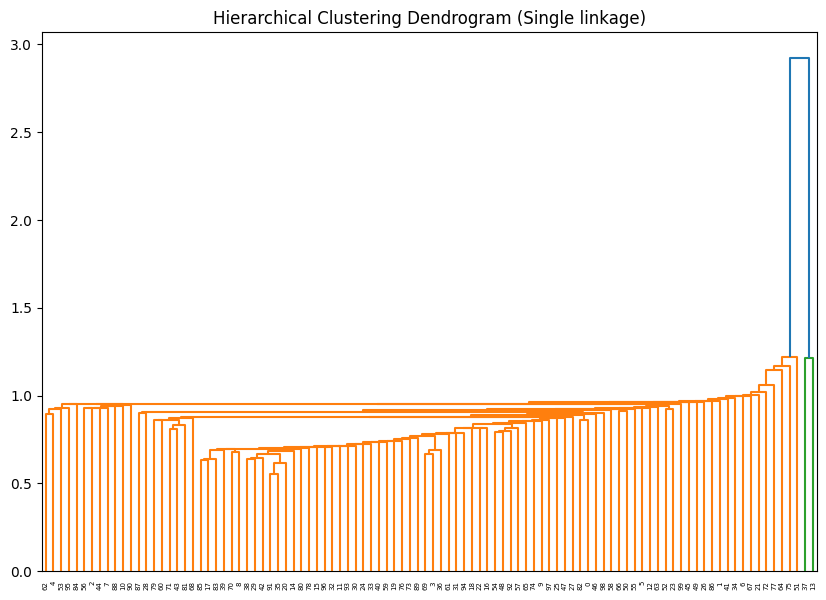

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


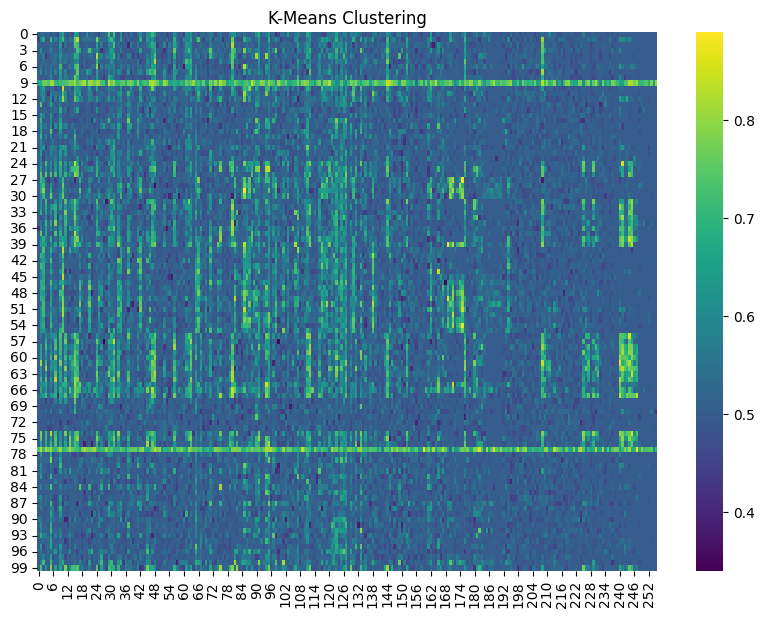

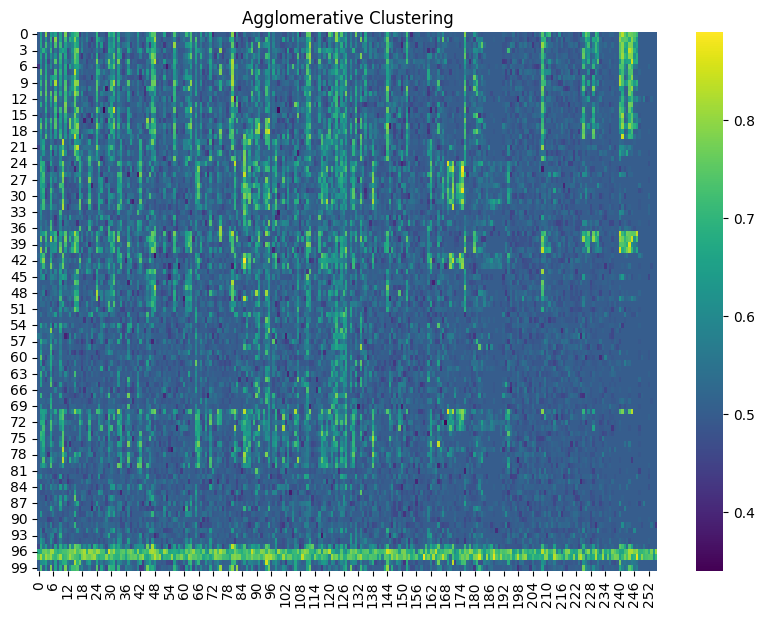

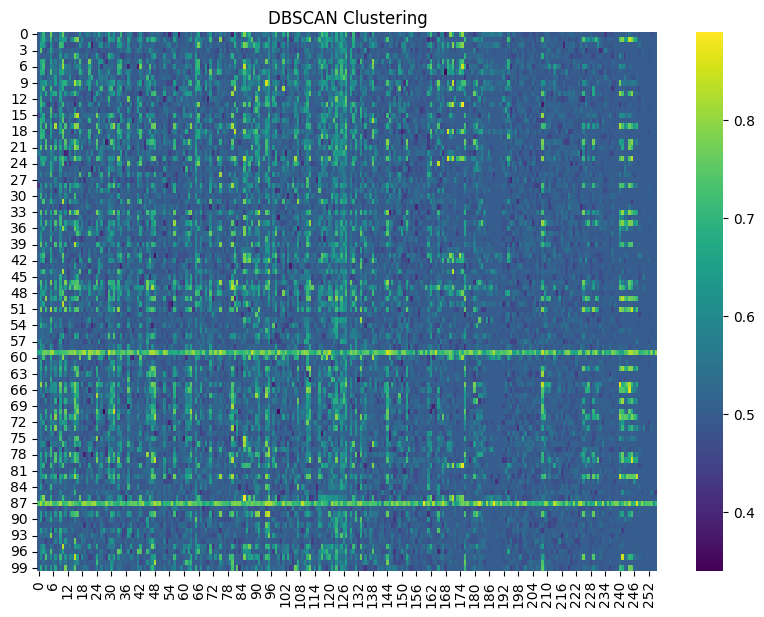

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Assuming 'data_corrected' is your matrix
# Replace 'data_corrected' with the name of your data array
# data_corrected = np.array([...])  # Your data here

# Hierarchical Clustering
plt.figure(figsize=(10, 7))
linked = linkage(data_corrected, 'single')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=20)  # Adjust the number of clusters as necessary
kmeans.fit(data_corrected)
labels = kmeans.labels_
# Creating a heatmap based on K-Means clustering
clustered_data_km = data_corrected[np.argsort(labels)]
plt.figure(figsize=(10, 7))
sns.heatmap(clustered_data_km, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=20, linkage='ward')  # You can change the linkage method
agglo.fit(data_corrected)
labels_agglo = agglo.labels_
# Creating a heatmap based on Agglomerative clustering
clustered_data_agglo = data_corrected[np.argsort(labels_agglo)]
plt.figure(figsize=(10, 7))
sns.heatmap(clustered_data_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=5, min_samples=10)  # Adjust parameters as necessary
dbscan.fit(data_corrected)
labels_dbscan = dbscan.labels_
# Filter out noise (-1 labels)
filtered_labels = labels_dbscan[labels_dbscan != -1]
filtered_data = data_corrected[labels_dbscan != -1]
# Creating a heatmap based on DBSCAN clustering
clustered_data_dbscan = filtered_data[np.argsort(filtered_labels)]
plt.figure(figsize=(10, 7))
sns.heatmap(clustered_data_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your files have a consistent naming pattern like "RNX2N.txt"
file_names = ['RNX2NB.txt', 'RNX2N2B.txt', 'RNX2N3.txt','RNX3N.txt', 'RNX3N2.txt', 'RNX3N3.txt', 'RNX4N.txt', 'RNX4N2.txt', 'RNX4N3.txt']
column_names = ['2NBias', '2NAlt', '2NNoise', '3NBias', '3NAlt', '3NNoise', '4NBias', '4NAlt', '4NNoise']
# Initialize a dictionary to hold the data for each file
full_data = {}


for file_index, file_name in enumerate(file_names):
    # Initialize a list to store the data for the current file
    columns_data = []

    with open(file_name, 'r') as file:
        for line in file:
            parts = [part.strip() for part in line.strip().split(',')]
            # Skip lines that are empty or don't have data beyond the ID
            if len(parts) > 1:
                data = [float(x) for x in parts[1:]]
                while len(columns_data) < len(data):
                    columns_data.append([])
                for i, value in enumerate(data):
                    columns_data[i].append(value)

    # Assign the list of values for the current file to the appropriate column in the data dictionary
    full_data[f'File{file_index+1}'] = columns_data

# Convert the dictionary to a DataFrame
df = pd.DataFrame(full_data)

# Optional: Give meaningful column names
df.columns = column_names

# Display the combined dataframe
df

2NBias  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.7, 0.67, 0.61, 0.71, 0.7, 0.68, 0.63, 0.69,...   
2    [0.63, 0.5, 0.5, 0.73, 0.68, 0.76, 0.69, 0.49,...   
3    [0.62, 0.74, 0.76, 0.6, 0.61, 0.57, 0.54, 0.62...   
4    [0.48, 0.51, 0.51, 0.53, 0.48, 0.51, 0.51, 0.5...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.51, 0.5, 0.5, 0.5, 0.51, 0.5, 0.5, 0.5...   
253  [0.51, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                                 2NAlt  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.65, 0.48, 0.54, 0.61, 0.59, 0.58, 0.38, 0.4...   
2    [0.96, 0.72, 0.97, 0.5, 0.87, 0.5, 1.0, 0.82, ...   
3    [0.5, 0.97, 0.5, 1.0, 0.95, 0.95, 0.81, 1.0, 0...   
4    [0.54, 0.53, 0.54, 0.5, 0.51, 0.51, 0.5, 0.48,...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.52, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                               2NNoise  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.48, 0.48, 0.49, 0.5, 0.57, 0.48, 0.53, 0.5,...   
2    [0.81, 0.5, 0.5, 0.5, 0.83, 0.5, 0.77, 0.8, 0....   
3    [0.87, 0.76, 0.77, 0.83, 0.75, 0.96, 0.87, 0.9...   
4    [0.47, 0.52, 0.5, 0.51, 0.49, 0.51, 0.54, 0.49...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.53, 0.51, 0.5, 0.5, 0.5, 0.5, 0.48, 0.47, 0...   
253  [0.48, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                                3NBias  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.66, 0.65, 0.68, 0.69, 0.57, 0.56, 0.61, 0.6...   
2    [0.5, 0.5, 0.73, 0.49, 0.78, 0.71, 0.5, 0.72, ...   
3    [0.67, 0.81, 0.6, 0.51, 0.66, 0.72, 0.62, 0.5,...   
4    [0.5, 0.45, 0.53, 0.5, 0.47, 0.54, 0.5, 0.5, 0...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.51, 0.5, 0.5, 0.5, 0.5, 0.51, 0.5, 0.5...   
253  [0.5, 0.5, 0.51, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                                 3NAlt  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.5, 0.53, 0.5, 0.5, 0.5, 0.5, 0.43, 0.53, 0....   
2    [0.98, 0.98, 0.93, 0.98, 0.99, 0.63, 0.51, 1.0...   
3    [0.77, 0.99, 0.98, 0.53, 0.99, 0.88, 0.5, 0.96...   
4    [0.49, 0.49, 0.51, 0.55, 0.51, 0.5, 0.51, 0.54...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.48, 0.51, 0.48, 0.5, 0.52, 0.51, 0.5, ...   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                               3NNoise  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.49, 0.47, 0.49, 0.5, 0.47, 0.5, 0.5, 0.5, 0...   
2    [0.61, 0.87, 0.5, 0.93, 0.85, 0.85, 0.92, 0.77...   
3    [0.75, 0.46, 0.67, 0.69, 0.5, 0.5, 0.53, 0.77,...   
4    [0.49, 0.5, 0.49, 0.5, 0.5, 0.47, 0.49, 0.49, ...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.5, 0.5, 0.5, 0.5, 0.46, 0.5, 0.5, 0.5,...   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your files have a consistent naming pattern like "RNX2N.txt"
file_names = ['RNXBA.txt','RNXBA2B.txt', 'RNXBA3.txt','RNXER.txt','RNXER2.txt','RNXER3.txt','RNXWS.txt','RNXWS2.txt', 'RNXWS3.txt','RNX2NB.txt', 'RNX2N2B.txt', 'RNX2N3.txt', 'RNX3N.txt', 'RNX3N2.txt', 'RNX3N3.txt', 'RNX4N.txt', 'RNX4N2.txt', 'RNX4N3.txt']
column_names = ['BABias', 'BAAlt', 'BANoise', 'ERBias', 'ERAlt','ERNoise', 'WSBias', 'WSAlt','WSNoise', '2NBias', '2NAlt', '2NNoise', '3NBias', '3NAlt', '3NNoise', '4NBias', '4NAlt', '4NNoise']
# Initialize a dictionary to hold the data for each file
full_data = {}


for file_index, file_name in enumerate(file_names):
    # Initialize a list to store the data for the current file
    columns_data = []

    with open(file_name, 'r') as file:
        for line in file:
            parts = [part.strip() for part in line.strip().split(',')]
            # Skip lines that are empty or don't have data beyond the ID
            if len(parts) > 1:
                data = [float(x) for x in parts[1:]]
                while len(columns_data) < len(data):
                    columns_data.append([])
                for i, value in enumerate(data):
                    columns_data[i].append(value)

    # Assign the list of values for the current file to the appropriate column in the data dictionary
    full_data[f'File{file_index+1}'] = columns_data

# Convert the dictionary to a DataFrame
df = pd.DataFrame(full_data)

# Optional: Give meaningful column names
df.columns = column_names

# Display the combined dataframe
df

BABias  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.56, 0.66, 0.53, 0.5, 0.48, 0.52, 0.58, 0.8,...   
2    [0.7, 0.5, 0.5, 0.5, 0.5, 0.57, 0.5, 0.5, 0.5,...   
3    [0.52, 0.62, 0.68, 0.5, 0.59, 0.43, 0.61, 0.72...   
4    [0.51, 0.5, 0.5, 0.5, 0.47, 0.49, 0.54, 0.48, ...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
253  [0.48, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                                 BAAlt  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.46, 0.53, 0.5, 0.44, 0.49, 0.49, 0.6, 0.49,...   
2    [0.74, 0.5, 0.5, 0.5, 0.5, 1.0, 0.49, 0.5, 0.4...   
3    [0.68, 0.6, 0.74, 0.5, 1.0, 1.0, 0.98, 0.5, 0....   
4    [0.5, 0.5, 0.51, 0.51, 0.49, 0.51, 0.45, 0.5, ...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.53,...   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                               BANoise  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.51, 0.52, 0.53, 0.49, 0.54, 0.5, 0.5, 0.5, ...   
2    [0.5, 0.5, 0.9, 0.79, 0.72, 0.74, 0.5, 0.56, 0...   
3    [0.59, 0.86, 0.47, 0.49, 0.56, 0.58, 0.5, 0.48...   
4    [0.52, 0.51, 0.52, 0.49, 0.5, 0.52, 0.49, 0.5,...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.54, 0.5, 0.5, 0.5, 0.5, 0.5,...   
252  [0.5, 0.47, 0.5, 0.53, 0.5, 0.5, 0.5, 0.5, 0.5...   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
254  [0.5, 0.5, 0.52, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                                ERBias  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.66, 0.5, 0.65, 0.61, 0.62, 0.65, 0.52, 0.58...   
2    [0.5, 0.5, 0.76, 0.5, 0.73, 0.5, 0.5, 0.73, 0....   
3    [0.56, 0.5, 0.51, 0.64, 0.5, 0.5, 0.45, 0.5, 0...   
4    [0.52, 0.5, 0.52, 0.54, 0.5, 0.46, 0.53, 0.44,...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.5, 0.49, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
253  [0.5, 0.5, 0.47, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                                 ERAlt  \
0    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
1    [0.96, 0.54, 0.45, 0.51, 0.5, 0.47, 0.69, 0.52...   
2    [0.5, 0.99, 0.47, 0.54, 0.6, 0.49, 0.76, 0.5, ...   
3    [0.63, 0.51, 0.49, 0.53, 0.98, 0.49, 0.49, 1.0...   
4    [0.5, 0.49, 0.5, 0.51, 0.46, 0.5, 0.51, 0.47, ...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.51, 0.5, 0.5, 0.5, 0.51, 0.51, 0.5, 0.5, 0....   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49, 0.5, 0.49...   
254  [0.5, 0.5, 0.5, 0.5, 0.5, 0.48, 0.44, 0.5, 0.5...   
255  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   

                                               ERNoise  \
0    [0.5, 0.41, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5,...   
1    [0.79, 0.5, 0.69, 0.5, 0.73, 0.5, 0.47, 0.63, ...   
2    [0.5, 0.49, 0.5, 0.5, 0.51, 0.79, 0.47, 0.69, ...   
3    [0.79, 0.49, 0.5, 0.88, 0.75, 0.5, 0.52, 0.5, ...   
4    [0.47, 0.5, 0.5, 0.46, 0.51, 0.48, 0.49, 0.55,...   
..                                                 ...   
251  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...   
252  [0.5, 0.5, 0.51, 0.51, 0.5, 0.5, 0.5, 0.49, 0....   
253  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

<ipython-input-4-84484f100d03>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('Paired', num_columns)  # Replace 'viridis' with your preferred colormap


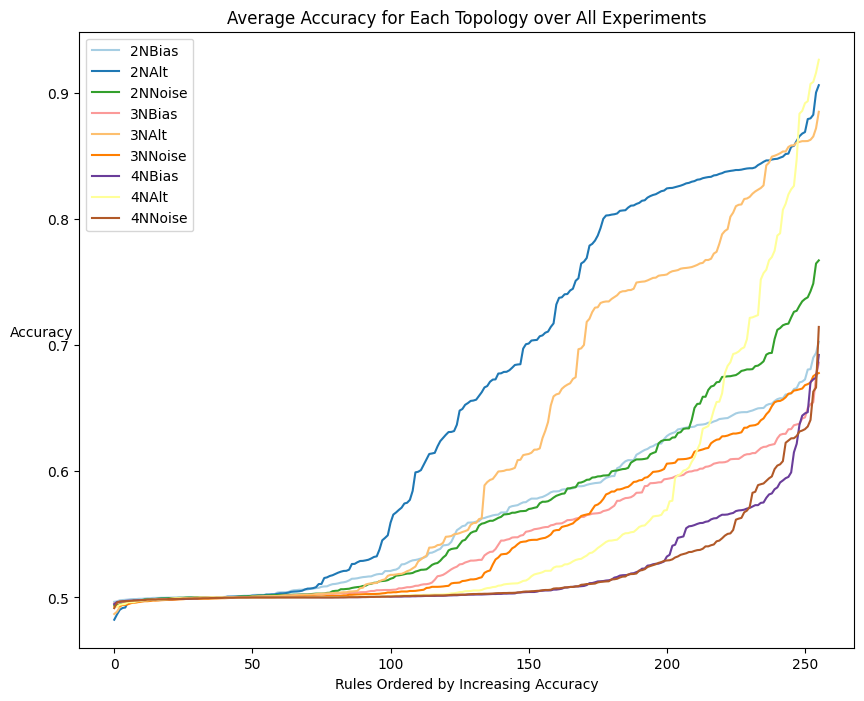

In [4]:
from matplotlib.cm import get_cmap

# Step 1: Create a new DataFrame for averages
df_averages = df.copy()

for column in df_averages.columns:
    df_averages[column] = df_averages[column].apply(lambda x: np.mean(x))

# Step 2: This step will be considered in plotting, as you might not want to alter the original DataFrame
# Number of columns to plot
num_columns = len(df_averages.columns)
# Choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis')
colormap = get_cmap('Paired', num_columns)  # Replace 'viridis' with your preferred colormap


# Step 3: Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# For each column, plot the sorted averages
for idx, column in enumerate(df_averages.columns):
    sorted_averages = df_averages[column].sort_values().reset_index(drop=True)
    ax.plot(sorted_averages, label=column, color=colormap(idx))

ax.set_ylabel('Accuracy', rotation=0)
ax.set_xlabel('Rules Ordered by Increasing Accuracy')
ax.set_title('Average Accuracy for Each Topology over All Experiments')
ax.legend()


plt.show()

<ipython-input-18-f7e282ed3fe0>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = colormap = get_cmap('tab10', num_columns)


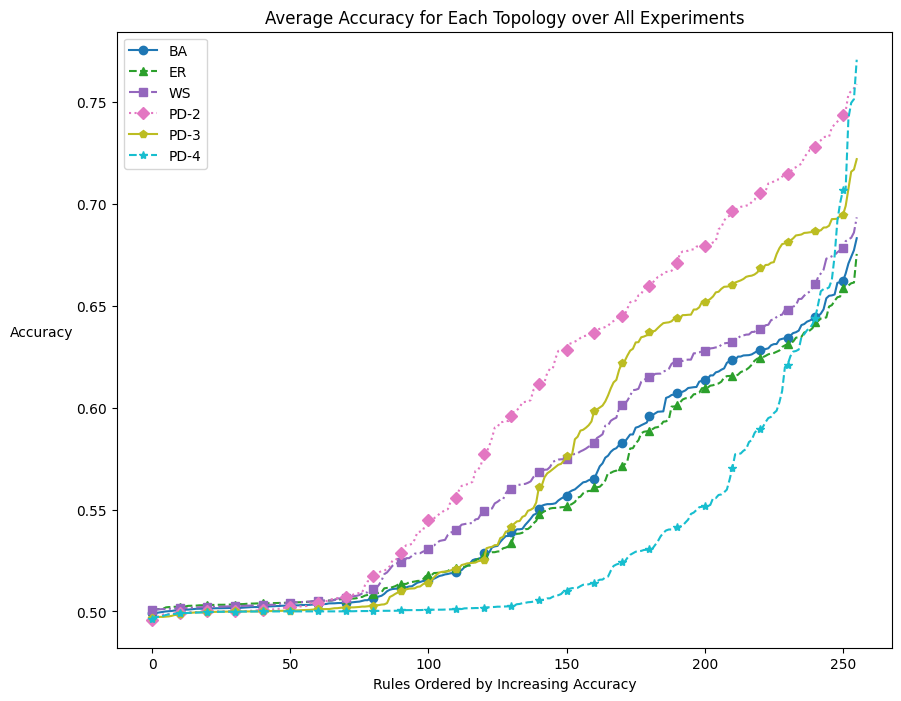

In [18]:
from matplotlib.cm import get_cmap

# Step 1: Create a new DataFrame for averages
df_averages = df.copy()

for column in df_averages.columns:
    df_averages[column] = df_averages[column].apply(lambda x: np.mean(x))

group_averages_data = {}
num_groups = len(df_averages.columns) // 3 + (0 if len(df_averages.columns) % 3 == 0 else 1)

column_names = ['BA', 'ER', 'WS', 'PD-2', 'PD-3','PD-4']

for i in range(num_groups):
    # Select three columns for the current group
    group_columns = df_averages.columns[i*3:(i+1)*3]

    # Check if there are columns to process
    if group_columns.size > 0:
        # Compute the average of the selected columns for each row and assign it to the new group
        group_name = f'Group_{i+1}'
        group_averages_data[group_name] = df_averages[group_columns].apply(lambda x: np.mean(x), axis=1)

df_group_averages = pd.DataFrame(group_averages_data)
df_group_averages.columns = column_names


# Assuming df_group_averages is your DataFrame

# Define your line styles, markers, and marker frequency
styles_markers_and_frequency = [
    ('-', 'o', 10),  # Solid line with circles, every 10th data point
    ('--', '^', 10),  # Dashed line with triangles, every 10th data point
    ('-.', 's', 10),  # Dash-dot line with squares, every 10th data point
    (':', 'D', 10),   # Dotted line with diamonds, every 10th data point
    ('-', 'p', 10),  # Solid line with pentagons, every 10th data point
    ('--', '*', 10)   # Dashed line with stars, every 10th data point
]

# Number of columns to plot (should be 6 for your case)
num_columns = len(df_group_averages.columns)

# Choose your colormap
colormap = colormap = get_cmap('tab10', num_columns)

# Start plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each column with different line style, marker, and marker frequency
for idx, column in enumerate(df_group_averages.columns):
    sorted_averages = df_group_averages[column].sort_values().reset_index(drop=True)
    line_style, marker, markevery = styles_markers_and_frequency[idx]
    ax.plot(sorted_averages, label=column, color=colormap(idx), linestyle=line_style, marker=marker, markevery=markevery)

ax.set_ylabel('Accuracy', rotation=0, labelpad=25)
ax.set_xlabel('Rules Ordered by Increasing Accuracy')
ax.set_title('Average Accuracy for Each Topology over All Experiments')
ax.legend()

plt.show()


In [ ]:
# Assuming 'df' is your original DataFrame

# Initialize dictionaries to hold averages and standard deviations
averages = {}
std_devs = {}

for column in df.columns:
    # Compute the mean and standard deviation for each list in the column
    averages[column] = df[column].apply(np.mean)
    std_devs[column] = df[column].apply(np.std)

# Convert the dictionaries to DataFrames
df_averages = pd.DataFrame(averages)
df_std_devs = pd.DataFrame(std_devs)

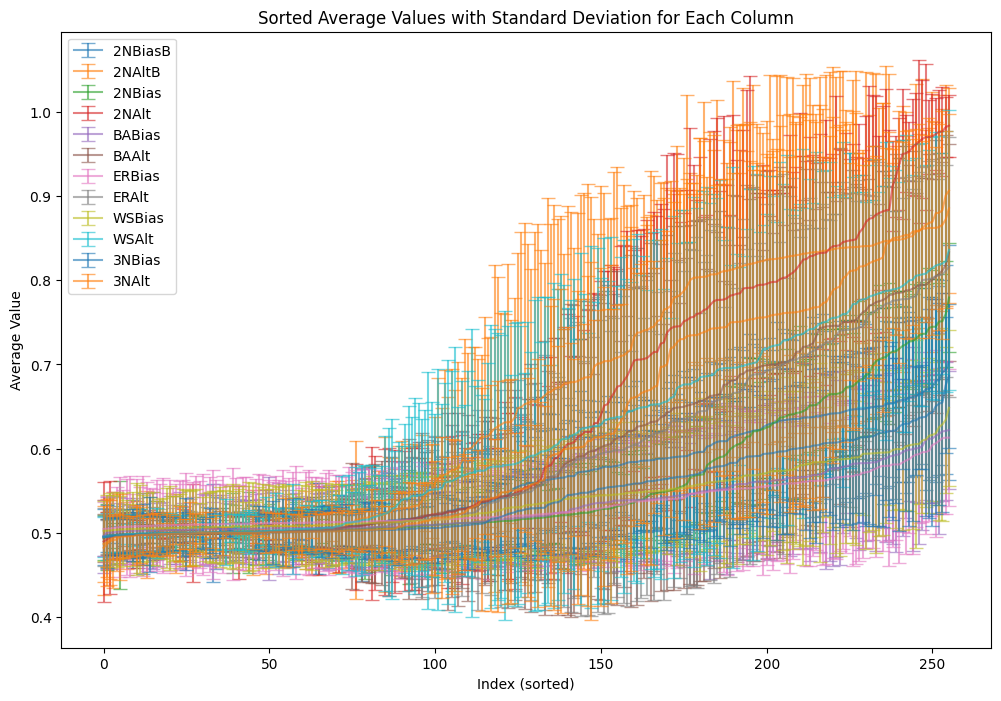

In [ ]:
plt.figure(figsize=(12, 8))

# Iterate over columns to plot
for column in df_averages.columns:
    # Sort the averages for plotting
    sorted_indices = df_averages[column].sort_values().index
    sorted_averages = df_averages[column].loc[sorted_indices]
    sorted_std_devs = df_std_devs[column].loc[sorted_indices]

    plt.errorbar(range(len(sorted_averages)), sorted_averages, yerr=sorted_std_devs, label=column, capsize=5, alpha=0.6)

plt.xlabel('Index (sorted)')
plt.ylabel('Average Value')
plt.title('Sorted Average Values with Standard Deviation for Each Column')
plt.legend()
plt.show()

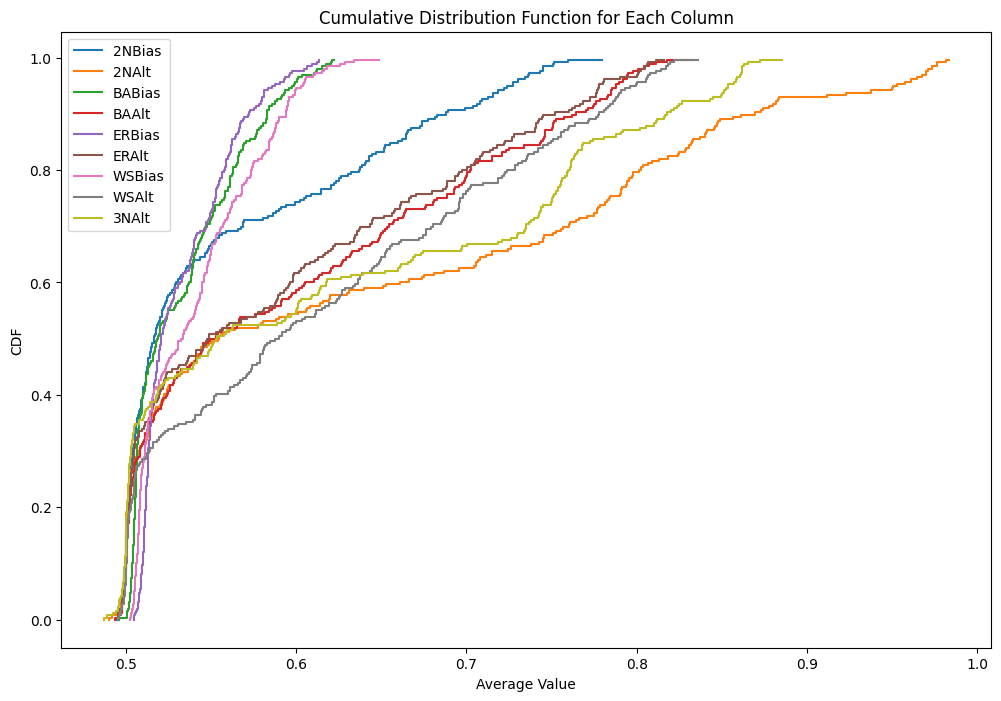

In [ ]:
plt.figure(figsize=(12, 8))

for column in df.columns:
    sorted_data = np.sort(df[column].apply(np.mean).dropna())
    plt.step(sorted_data, np.arange(sorted_data.size) / sorted_data.size, label=column)

plt.xlabel('Average Value')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function for Each Column')
plt.legend()
plt.show()

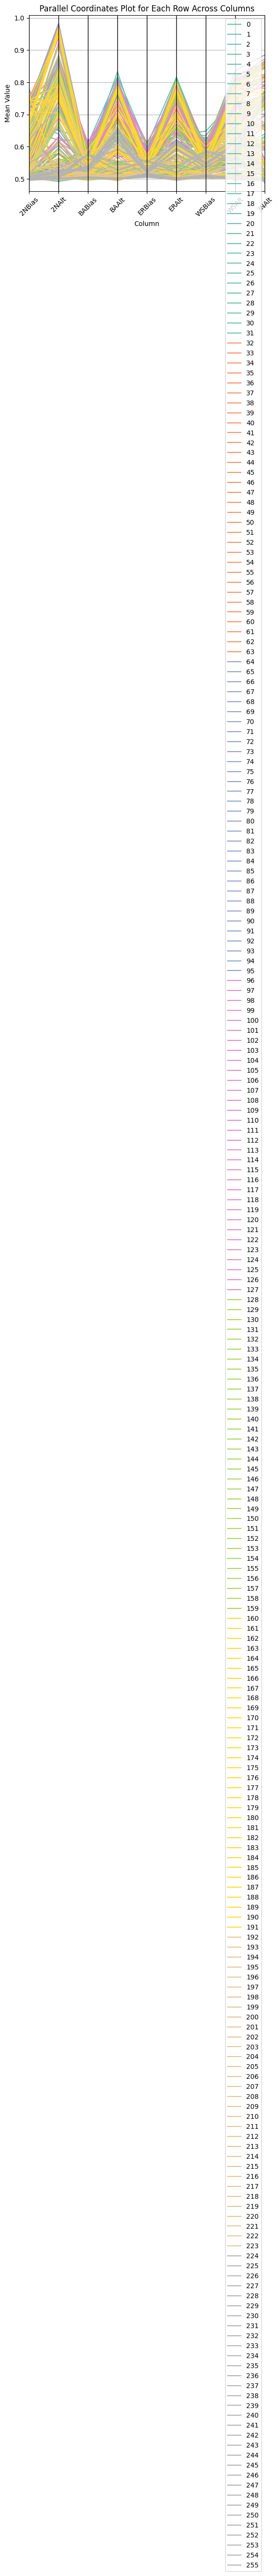

In [ ]:
from pandas.plotting import parallel_coordinates

# First, ensure each row is represented as a single value per column, for example by taking the mean
df_means = df.applymap(np.mean)

# Add a 'Row' column to use as the class column
df_means['Row'] = range(len(df_means))

parallel_coordinates(df_means, 'Row', colormap=plt.get_cmap("Set2"))
plt.xlabel('Column')
plt.ylabel('Mean Value')
plt.title('Parallel Coordinates Plot for Each Row Across Columns')
plt.xticks(rotation=45)
plt.show()

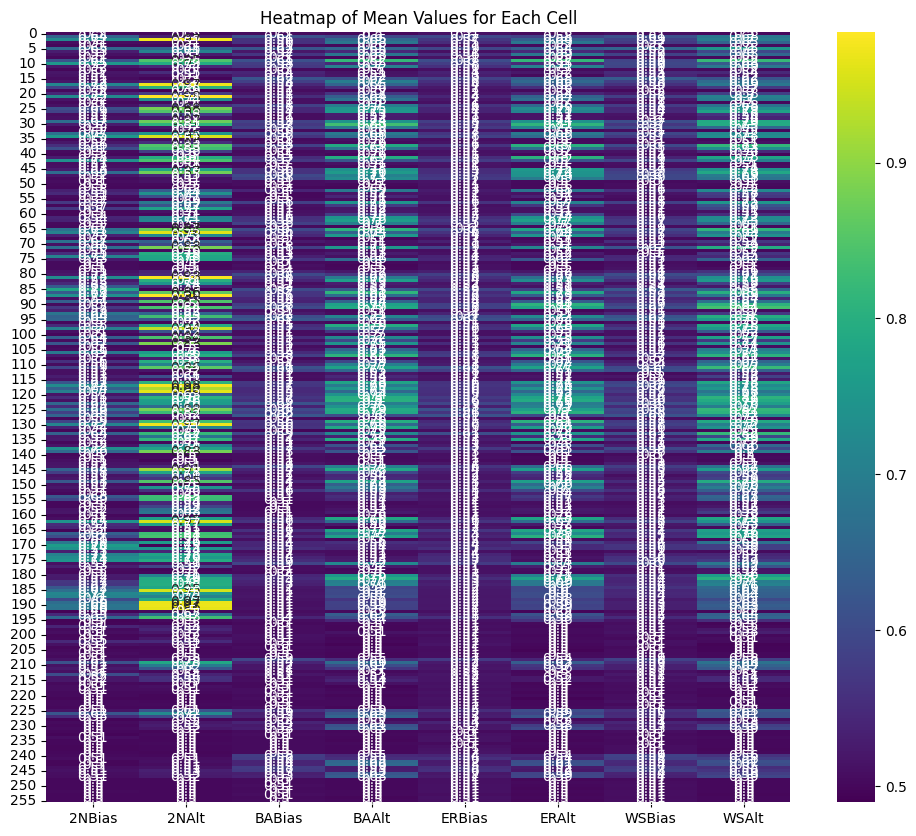

In [ ]:
import seaborn as sns

# Calculate means for each cell (row per column)
df_means = df.applymap(np.mean)

plt.figure(figsize=(12, 10))
sns.heatmap(df_means, cmap='viridis', annot=True)
plt.title('Heatmap of Mean Values for Each Cell')
plt.show()

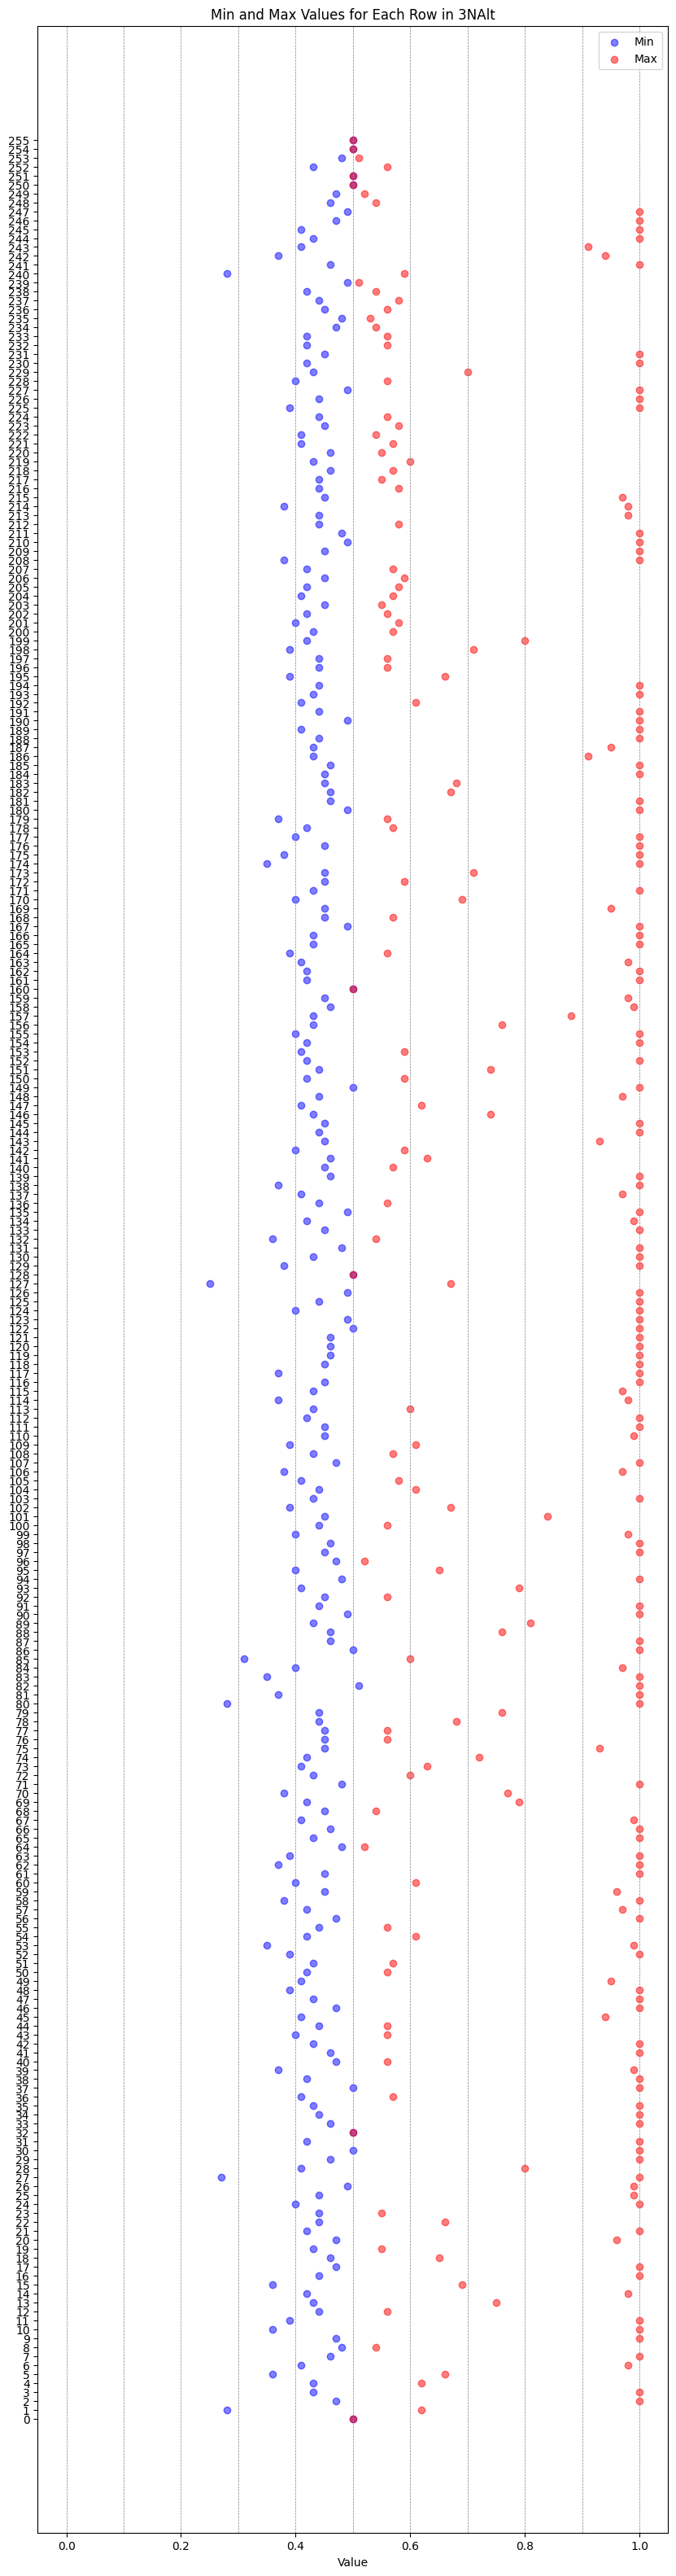

In [ ]:
plt.figure(figsize=(10, 40))

# Choose a column to visualize, for example:
column = '3NAlt'

# Calculate min and max for each row in the chosen column
min_max_values = df[column].apply(lambda x: (np.min(x), np.max(x))).tolist()
mins, maxs = zip(*min_max_values)



row_ids = df.index.tolist()

# Plotting
plt.scatter(mins, range(len(mins)), color='blue', alpha=0.5, label='Min')
plt.scatter(maxs, range(len(maxs)), color='red', alpha=0.5, label='Max')

# Adding vertical lines for each 0.1 breakpoint
for x in np.arange(0, 1.1, 0.1):
    plt.axvline(x, color='grey', linestyle='--', linewidth=0.5)

plt.legend()
plt.yticks(np.arange(len(row_ids)), labels=row_ids)
plt.title(f'Min and Max Values for Each Row in {column}')
plt.xlabel('Value')
plt.show()

In [20]:
# Step 1: Compute Averages for Each Cell
df_averages = df.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

# Step 2: Rank Averages Within Columns
# 'min' method assigns the same rank to equal values, change as needed
df_ranks = df_averages.rank(method='min', ascending=False, axis=0)

# Step 3: Sum Scores Across Columns for Each Row
df_ranks['Combined Score'] = df_ranks.sum(axis=1)

# Step 4: Sort Rows Based on Combined Score
df_sorted_by_score = df_ranks.sort_values(by='Combined Score')



# If you want to see the original data rows sorted according to the combined score
# Drop the 'Combined Score' column for sorting indexes only
sorted_indexes = df_sorted_by_score.drop(columns=['Combined Score']).index
df_sorted_original_data = df.loc[sorted_indexes]

In [ ]:
# Display the sorted DataFrame (you might want to display the original data rows sorted in this order)
df_sorted_by_score

2NBias  2NAlt  2NNoise  BABias  BAAlt  BANoise  ERBias  ERAlt  ERNoise  \
71     25.0    2.0      9.0    30.0   30.0     19.0    13.0   43.0     13.0   
9      31.0    5.0     63.0     8.0    2.0      6.0     6.0    1.0     15.0   
65     46.0    8.0     48.0    13.0    5.0      9.0     9.0   13.0     11.0   
125    37.0    7.0     48.0    11.0   12.0     16.0     3.0   22.0     23.0   
91    126.0   16.0     56.0    14.0   15.0      1.0    15.0   16.0      5.0   
..      ...    ...      ...     ...    ...      ...     ...    ...      ...   
51    248.0  235.0    197.0   254.0  244.0    207.0   209.0  202.0    234.0   
200   254.0  248.0    247.0   151.0  192.0    249.0   252.0  218.0    247.0   
205   249.0  231.0    253.0   228.0  222.0    250.0   250.0  255.0    203.0   
207   215.0  235.0    229.0   214.0  248.0    254.0   242.0  185.0    248.0   
132   217.0  232.0    252.0   256.0  198.0    239.0   240.0  189.0    241.0   

     WSBias  WSAlt  WSNoise  3NBias  3NAlt  3NNoise  Combined Score  
71      5.0   15.0      9.0    36.0   34.0     12.0           295.0  
9      28.0    3.0     32.0    45.0   13.0     59.0           317.0  
65     27.0    7.0     17.0    39.0   19.0     53.0           324.0  
125    19.0    5.0     39.0    23.0    7.0     61.0           333.0  
91     10.0    1.0      2.0    52.0    1.0      6.0           336.0  
..      ...    ...      ...     ...    ...      ...             ...  
51    223.0  238.0    237.0   235.0  207.0    217.0          3387.0  
200   232.0  215.0    229.0   232.0  236.0    242.0          3444.0  
205   236.0  254.0    201.0   189.0  179.0    244.0          3444.0  
207   213.0  238.0    199.0   254.0  243.0    233.0          3450.0  
132   212.0  250.0    252.0   232.0  253.0    226.0          3489.0  

[256 rows x 16 columns]

In [ ]:
df_sorted_original_data

In [51]:
df_averages = df.applymap(lambda x: np.mean(x) if isinstance(x, list) else np.nan)

df_averages = (df_averages - df_averages.min()) / (df_averages.max() - df_averages.min())

#df_averages = df.applymap(lambda x: (np.mean(x[:len(x)//2]) - np.mean(x[len(x)//2:])) if isinstance(x, list) and len(x) > 0 else np.nan)
df_averages['Total Score'] = df_averages.mean(axis=1)


# Check if there are at least three columns, to avoid errors
if len(df_averages.columns) >= 3:
    # Total score based on the average of the first three columns
    df_averages['Total Score First 3'] = df_averages.iloc[:, 0:3].mean(axis=1)

# Check if there are at least six columns, to avoid errors
if len(df_averages.columns) >= 6:
    # Total score based on the average of the second set of three columns
    df_averages['Total Score Second 3'] = df_averages.iloc[:, 3:6].mean(axis=1)

# Check if there are at least nine columns, to avoid errors
if len(df_averages.columns) >= 9:
    # Total score based on the average of the third set of three columns
    df_averages['Total Score Last 3'] = df_averages.iloc[:, 6:9].mean(axis=1)

# Computing standard deviation for each original column
df_stddev = df.applymap(lambda x: np.std(x) if isinstance(x, list) else np.nan)

# Renaming columns to indicate these are standard deviations
df_stddev.columns = [f'{col} StdDev' for col in df_stddev.columns]

# Check if there are at least three columns, to avoid errors
if len(df_stddev.columns) >= 3:
    # Mean standard deviation based on the first three columns
    df_stddev['Mean StdDev First 3'] = df_stddev.iloc[:, 0:3].mean(axis=1)

# Check if there are at least six columns, to avoid errors
if len(df_stddev.columns) >= 6:
    # Mean standard deviation based on the second set of three columns
    df_stddev['Mean StdDev Second 3'] = df_stddev.iloc[:, 3:6].mean(axis=1)

# Check if there are at least nine columns, to avoid errors
if len(df_stddev.columns) >= 9:
    # Mean standard deviation based on the third set of three columns
    df_stddev['Mean StdDev Last 3'] = df_stddev.iloc[:, 6:9].mean(axis=1)

# Combine the mean and standard deviation dataframes
df_combined = pd.concat([df_averages, df_stddev], axis=1)

# Compute total variation (standard deviation) across original columns and add as new column
# Here we assume df contains the original data, not the one with calculated means
total_variation = df.applymap(lambda x: np.std(x) if isinstance(x, list) else np.nan).mean(axis=1)
df_combined['Mean StdDev'] = total_variation

df_combined['Score Minus StdDev'] = df_combined['Total Score'] - df_combined['Mean StdDev']

df_sorted_by_total_score = df_combined.sort_values(by='Total Score', ascending=False)
df_final_sorted = df_sorted_by_total_score.drop(columns=['Total Score'])

# Display the DataFrame sorted by total score
df_sorted_by_total_score

2NBias     2NAlt   2NNoise    3NBias     3NAlt   3NNoise    4NBias  \
91   0.305381  0.862297  0.479342  0.531136  1.000000  0.948276  0.890744   
123  0.745032  0.709267  0.424132  0.942439  0.941531  0.633082  1.000000   
144  0.779447  0.846263  1.000000  0.703820  0.692848  0.927263  0.468386   
16   0.782841  0.839660  0.990859  0.659341  0.695107  0.925108  0.510369   
2    0.797382  0.837774  0.892870  0.624280  0.704893  0.995151  0.444107   
..        ...       ...       ...       ...       ...       ...       ...   
200  0.005817  0.034897  0.014260  0.019362  0.029862  0.027478  0.040971   
222  0.016966  0.038670  0.020841  0.009942  0.023839  0.024784  0.029843   
221  0.000000  0.048338  0.019378  0.023548  0.028105  0.042565  0.028832   
50   0.011634  0.045037  0.017185  0.008896  0.023338  0.043103  0.020233   
132  0.018420  0.040321  0.008044  0.019362  0.018570  0.035022  0.020738   

        4NAlt   4NNoise  Total Score  ...  3NAlt StdDev  3NNoise StdDev  \
91   1.000000  1.000000     0.779686  ...      0.112334        0.111254   
123  0.955832  0.603765     0.772786  ...      0.126546        0.087664   
144  0.475040  0.612281     0.722817  ...      0.230679        0.162150   
16   0.464458  0.636486     0.722692  ...      0.233434        0.165566   
2    0.462848  0.631555     0.710096  ...      0.230138        0.171145   
..        ...       ...          ...  ...           ...             ...   
200  0.009892  0.050202     0.025860  ...      0.024317        0.022776   
222  0.019784  0.047961     0.025848  ...      0.023776        0.022249   
221  0.000000  0.036307     0.025230  ...      0.024698        0.021792   
50   0.023925  0.032721     0.025119  ...      0.024244        0.025648   
132  0.009892  0.023756     0.021569  ...      0.026427        0.025373   

     4NBias StdDev  4NAlt StdDev  4NNoise StdDev  Mean StdDev First 3  \
91        0.077391      0.112536        0.117639             0.077971   
123       0.073132      0.117538        0.097147             0.104863   
144       0.097978      0.227309        0.156638             0.149899   
16        0.104425      0.230659        0.163996             0.150917   
2         0.095722      0.233138        0.161432             0.151217   
..             ...           ...             ...                  ...   
200       0.023541      0.023099        0.019383             0.025201   
222       0.017019      0.021184        0.017865             0.025109   
221       0.021537      0.020134        0.020392             0.022030   
50        0.024481      0.023189        0.022816             0.021378   
132       0.027103      0.026973        0.022929             0.021673   

     Mean StdDev Second 3  Mean StdDev Last 3  Mean StdDev  Score Minus StdDev  
91               0.099762            0.102522     0.093418            0.686268  
123              0.098395            0.095939     0.099732            0.673054  
144              0.165305            0.160642     0.158615            0.564201  
16               0.168186            0.166360     0.161821            0.560871  
2                0.169007            0.163431     0.161218            0.548877  
..                    ...                 ...          ...                 ...  
200              0.024401            0.022008     0.023870            0.001990  
222              0.021963            0.018689     0.021920            0.003928  
221              0.021829            0.020688     0.021516            0.003715  
50               0.024198            0.023495     0.023024            0.002095  
132              0.023465            0.025669     0.023602           -0.002033  

[256 rows x 27 columns]

In [52]:
# Specify your file path
file_path = 'sorted_data.csv'

# Export the DataFrame to CSV
df_sorted_by_total_score.to_csv(file_path, index=True)

In [ ]:

# To apply the sorted order back to the original DataFrame, extract the sorted index
sorted_indices = df_sorted_by_total_score.index

# Apply this order to the original DataFrame if needed
df_sorted_original = df.loc[sorted_indices]
df_sorted_original

In [ ]:
import random

# Function to generate a random sequence of 'a' and 'b', 14 letters long
def generate_sequence():
    return ''.join(random.choice(['a', 'b']) for _ in range(14))

# Generate and print the sequence
sequence = generate_sequence()
sequence

'abbbabaabbaaba'

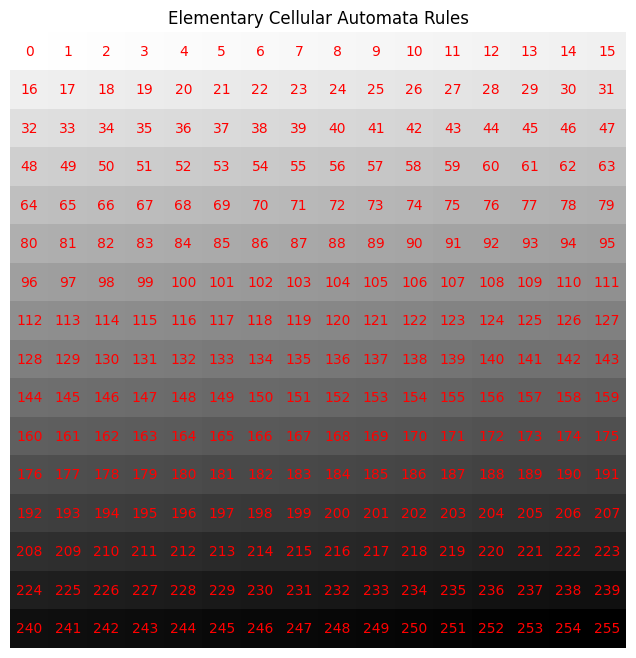

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 16x16 grid for the 256 rules
grid_size = 16
rule_numbers = np.arange(0, 256).reshape((grid_size, grid_size))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(rule_numbers, cmap='binary', interpolation='nearest')

# Annotate each cell with the corresponding rule number
for (i, j), rule_number in np.ndenumerate(rule_numbers):
    ax.text(j, i, str(rule_number), ha='center', va='center', color="red")

ax.set_title('Elementary Cellular Automata Rules')
ax.axis('off')  # Turn off the axis
plt.show()

In [48]:
# x > 0.7
specified_numbers = [91, 123 ]

In [46]:
# 0.6 < x < 0.7
specified_numbers = [
    94, 144, 16, 56, 2, 98, 126, 116, 130, 30, 24, 46, 66, 118, 62, 107,
    121, 86, 48, 34, 131, 29, 145, 71, 125, 65, 176, 122, 111, 9, 31, 162,
    47, 133, 11, 117, 87, 33, 81, 63, 7, 3, 129, 119, 209, 135, 17, 38,
    37, 21, 80, 149, 112, 227, 52, 139, 120, 90, 185, 82, 41, 42, 10, 226,
    25, 97, 184, 61, 26, 152, 67, 106, 246, 194, 191, 103, 247, 190, 231, 189,
    181, 180, 208
]


In [44]:
# 0.51 < x < 0.6
specified_numbers = [
    167, 124, 110, 166, 109, 210, 45, 161, 154, 138, 211, 245, 101, 155, 175, 225,
    75, 244, 169, 230, 146, 95, 188, 89, 174, 18, 193, 183, 241, 137, 182, 165, 242,
    22, 186, 15, 171, 20, 6, 243, 187, 88, 85, 5, 229, 74, 127, 134, 73, 177, 58, 148,
    173, 105, 114, 163, 27, 13, 151, 83, 69, 39, 57, 1, 159, 79, 215, 99, 93, 53, 214,
    170, 158, 102, 240, 60, 14, 147, 84, 28, 143, 157, 54, 213, 199, 70, 115, 36, 198
]


In [ ]:
# Less than 0.51
specified_numbers = [
    59, 202, 156, 216, 108, 78, 141, 113, 49, 228, 172, 164, 197, 43, 35, 92, 142, 150, 44, 212, 104, 178, 218, 224,
    219, 168, 201, 196, 153, 217, 100, 195, 203, 179, 140, 248, 237, 223, 234, 23, 77, 192, 4, 220, 76, 40, 68, 160, 8,
    239, 235, 51, 136, 253, 72, 255, 254, 251, 250, 32, 0, 252, 128, 96, 249, 232, 207, 236, 205, 206, 12, 55, 238, 64,
    204, 233, 50, 222, 200, 19, 221, 132
]

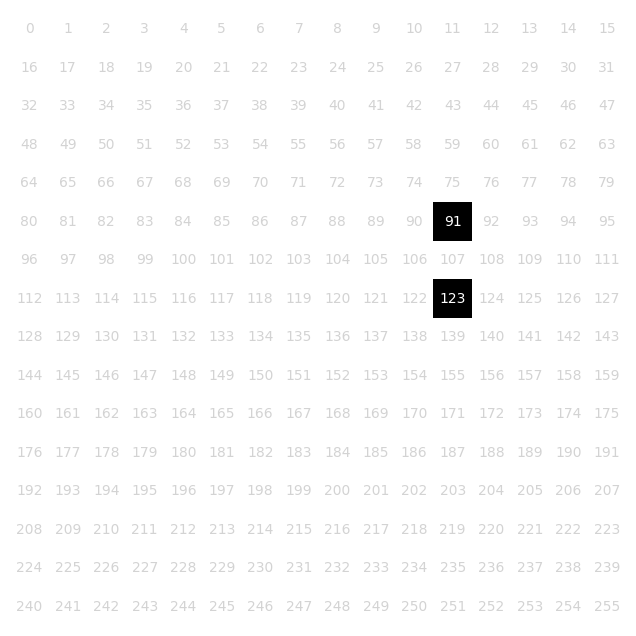

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size and create an empty grid
grid_size = 16
grid = np.ones((grid_size, grid_size))

# List of specified numbers to display


# Fill the grid positions corresponding to the specified numbers
for number in specified_numbers:
    row = number // grid_size
    col = number % grid_size
    grid[row, col] = 0  # Mark this position as filled

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
cmap = plt.cm.gray  # Use a gray colormap where 0 is white and 1 is black
ax.imshow(grid, cmap=cmap, interpolation='nearest')

# Annotate each cell with the corresponding rule number if it's in specified_numbers
for number in range(256):
    row = number // grid_size
    col = number % grid_size
    if number in specified_numbers:
        ax.text(col, row, str(number), ha='center', va='center', color="white")
    else:
        ax.text(col, row, str(number), ha='center', va='center', color="lightgray")

ax.axis('off')  # Turn off the axis
plt.show()